# Data science Technical Assessment

## Section 1 - Analysis of the data set

This section has 5 main sections:

* Loading and joining the data
* Cleaning the data
* Finding the largest Firms
* Changing Business profile
* Finding outliers in the data
* Summary


### Loading and joining the data

This first section outlines how I read in the data, analysed the structure and formats, joined the data togather and also discusses the logic applied at each stage

#

In [1]:
# all required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from dateutil.relativedelta import relativedelta
from itables import init_notebook_mode
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# makes the dataframes more interactive in the workbook
init_notebook_mode(all_interactive  = True, connected= True)

In [2]:
# load the data - file stored in folder with the jupyter notebook

# after initially viewing the dataframes the headers are split into two rows with the metric in the top row, and then the date in the second, so for both sheets the header is read in as the top two rows
dfs = pd.read_excel("DataScientist_10069_Dataset.xlsx", header = [0,1], sheet_name= [0,1])

# split into two dataframes
df_general = dfs[0]
df_underwriting = dfs[1]

In [3]:
# viewing the general dataframe
df_general

Unnamed: 0_level_0     NWP (£m)                               \
    Unnamed: 0_level_1        2016YE        2017YE        2018YE   
0               Firm 1 -17754.100486      0.000000      0.000000   
1               Firm 2      9.244369      0.098771     40.812426   
2               Firm 3      0.000000      0.806130     36.620199   
3               Firm 4  19677.453353  41072.816156  20885.506445   
4               Firm 5    128.812208     10.407371     79.579663   
..                 ...           ...           ...           ...   
320           Firm 321      0.000000      0.000000     -0.167178   
321           Firm 322   3315.466643   4136.476625   2192.750865   
322           Firm 323      0.000000      0.000000      0.000000   
323           Firm 324     29.811172     21.003008     13.551740   
324           Firm 325    108.471899    496.296030    437.217641   

                                     SCR (£m)                              \
           2019YE        2020YE        2016YE        2017YE        2018YE   
0        0.000000      0.000000   2021.321862  6.940043e-09      0.000000   
1       35.643071     13.626145     16.459756  1.500907e+01     14.227214   
2       86.630018     54.744180    486.887796  4.957863e+02    626.612217   
3    14719.672914  49204.465136  15975.652771  1.536789e+04  10797.123319   
4       79.423623     61.727295     32.742279  4.395404e+01     31.622572   
..            ...           ...           ...           ...           ...   
320     -6.813367     31.258806      0.000000  3.652140e-01     70.399156   
321   2252.917257   2780.628432    578.238997  1.926540e+03   1366.552217   
322      0.000000      0.000000      6.459131  2.803774e+01      5.689804   
323      6.145755     49.793157     45.967315  5.732320e+01     36.910810   
324    120.652291      0.000000    402.002179  4.082730e+02    477.423649   

                   ... Total liabilities (£m)                              \
           2019YE  ...                 2016YE        2017YE        2018YE   
0        0.000000  ...           40171.683156      0.000000      0.000000   
1       15.037066  ...               7.970519     12.796789     11.332857   
2       81.242579  ...              68.000844   1592.310597   1005.328927   
3    22788.359468  ...           48416.743356  30870.226541  68145.069079   
4       30.119285  ...             267.458967     22.979292     69.343245   
..            ...  ...                    ...           ...           ...   
320     68.655722  ...               0.000000      0.005647   1776.379248   
321    849.073657  ...            5978.084709   5250.432938   4906.432272   
322      1.674462  ...              40.153398     33.497286     30.445115   
323      1.012305  ...             253.309101    353.395687    273.736970   
324    346.976664  ...             673.343922    989.011927   1762.579368   

                                 \
           2019YE        2020YE   
0        0.000000      0.000000   
1        6.730190     16.173862   
2      593.689101    374.712155   
3    92600.140108  92273.053968   
4       16.837470    106.179543   
..            ...           ...   
320   1843.139217  10455.584133   
321   6204.396397   5566.091662   
322     17.823604     13.019950   
323    354.965671    298.298975   
324   1487.323190      0.000000   

    Excess of assets over liabilities (£m) [= equity]               \
                                               2016YE       2017YE   
0                                         1243.924991     4.398725   
1                                            8.755261    48.425189   
2                                          210.918808   100.776891   
3                                        24862.167211  7191.961836   
4                                          262.683530     7.592281   
..                                                ...          ...   
320                                          0.000000     0.021877   
321                          

There are many issues with the data, such as the firm column not having a column name and the two level header - so the first column should be given a name and the data should be pivoted to a long format with each year as a row, so that it is more managable and can be joined to the second data set

In [4]:
# viewing the underwriting dataframe
df_underwriting

Unnamed: 0_level_0 Gross claims incurred (£m)                          \
    Unnamed: 0_level_1                     2016YE      2017YE      2018YE   
0               Firm 1                   0.000000    0.005515    0.000000   
1               Firm 2                  44.467865   29.489599   34.100482   
2               Firm 3                   0.000000    0.000000    0.000000   
3               Firm 4                  14.340938   71.062447   87.912471   
4               Firm 5                  48.738606  425.748869  691.379669   
..                 ...                        ...         ...         ...   
451           Firm 452                   0.000000    0.000000    0.000000   
452           Firm 453                   8.386235   -1.739109   -1.856683   
453           Firm 454                   2.000729    3.687010   32.552017   
454           Firm 455                   0.000000    4.549259    1.604993   
455           Firm 456                   0.000000    0.000000    0.000000   

                            Gross BEL (inc. TPs as whole, pre-TMTP) (£m)  \
         2019YE      2020YE                                       2016YE   
0      0.000000    0.000000                                     0.000000   
1      0.000000    0.000000                                   221.327680   
2      0.000000    0.000000                                     0.000000   
3     42.280402    3.668494                                   -35.112768   
4    174.101260    5.927624                                     8.386701   
..          ...         ...                                          ...   
451    0.000000    0.000000                                     0.000000   
452   -0.765950   -3.383745                                     1.694955   
453   14.850354   15.241039                                    -0.973747   
454    9.103593  185.079296                                     0.000000   
455    0.000000    0.000000                                     0.000000   

                                         ... Gross expense ratio             \
         2017YE      2018YE      2019YE  ...              2016YE     2017YE   
0      0.588994    0.000000    0.000000  ...            0.000000  77.251254   
1     59.474691  266.118414    0.000000  ...            0.391179   0.685941   
2      0.000000    0.000000    0.000000  ...            0.000000   0.000000   
3      7.848685  100.876270  167.959536  ...            0.231139   0.285471   
4    253.149414  587.461209  226.977435  ...            0.236128   0.232725   
..          ...         ...         ...  ...                 ...        ...   
451    0.000000    0.000000    0.000000  ...            0.000000   0.000000   
452  148.978198  253.854632  136.672432  ...            0.000000   0.000000   
453    9.898097   21.950784    4.471228  ...            0.124174   0.167220   
454   39.530014   15.362991   45.619029  ...            0.000000   1.689138   
455    0.000000    0.000000    0.000000  ...            0.000000   0.000000   

                                  Gross combined ratio                      \
       2018YE    2019YE    2020YE               2016YE    2017YE    2018YE   
0    0.000000  0.000000  0.000000             0.000000  0.675051  0.000000   
1    1.433284  0.000000  0.000000             1.750946  1.321523  1.545325   
2    0.000000  0.000000  0.000000             0.000000  0.000000  0.000000   
3    0.054150  0.051848 -0.162883             1.047234  0.476384  3.307379   
4    0.204508  0.131739  0.048703             0.243611  1.977732  2.495287   
..        ...       ...       ...                  ...       ...       ...   
451  0.000000  0.000000  0.000000             0.000000  0.000000  0.000000   
452  0.000000  0.000000  0.000000             0.000000  0.000000  0.000000   
453  0.606652  0.040353  0.441248             0.018731  2.615257  2.956422   
454  0.891070  0.905046  0.892326             0.000000  1.336544  0.793408   
455  0.000000  0.000000  0.000000             0.0

Looks nearly identical to the general dataframe so the same solutions should be applied

In [5]:
# first pivot the data longer using pd.melt needing to specify the id_var as a tuple given its a multiindex df
df_general = pd.melt(df_general, id_vars=[(df_general.columns[0][0],df_general.columns[0][1])])

In [6]:
# viewing the data again to check for the column names
df_general

(Unnamed: 0_level_0, Unnamed: 0_level_1)  \
0                                       Firm 1   
1                                       Firm 2   
2                                       Firm 3   
3                                       Firm 4   
4                                       Firm 5   
...                                        ...   
12995                                 Firm 321   
12996                                 Firm 322   
12997                                 Firm 323   
12998                                 Firm 324   
12999                                 Firm 325   

                                              variable_0 variable_1  \
0                                              NWP (£m)      2016YE   
1                                              NWP (£m)      2016YE   
2                                              NWP (£m)      2016YE   
3                                              NWP (£m)      2016YE   
4                                              NWP (£m)      2016YE   
...                                                  ...        ...   
12995  Excess of assets over liabilities (£m) [= equity]     2020YE   
12996  Excess of assets over liabilities (£m) [= equity]     2020YE   
12997  Excess of assets over liabilities (£m) [= equity]     2020YE   
12998  Excess of assets over liabilities (£m) [= equity]     2020YE   
12999  Excess of assets over liabilities (£m) [= equity]     2020YE   

              value  
0     -17754.100486  
1          9.244369  
2          0.000000  
3      19677.453353  
4        128.812208  
...             ...  
12995     60.013312  
12996   3640.241631  
12997      2.725257  
12998     21.921881  
12999      0.000000  

[13000 rows x 4 columns]

Now the data is in a useable long format but the column names should be changed to more useful values

In [7]:
# Rename columns and view data again
df_general.columns = ["Firm Name", "Metric", "Year", "Value"]
df_general

Firm Name                                             Metric    Year  \
0        Firm 1                                          NWP (£m)   2016YE   
1        Firm 2                                          NWP (£m)   2016YE   
2        Firm 3                                          NWP (£m)   2016YE   
3        Firm 4                                          NWP (£m)   2016YE   
4        Firm 5                                          NWP (£m)   2016YE   
...         ...                                                ...     ...   
12995  Firm 321  Excess of assets over liabilities (£m) [= equity]  2020YE   
12996  Firm 322  Excess of assets over liabilities (£m) [= equity]  2020YE   
12997  Firm 323  Excess of assets over liabilities (£m) [= equity]  2020YE   
12998  Firm 324  Excess of assets over liabilities (£m) [= equity]  2020YE   
12999  Firm 325  Excess of assets over liabilities (£m) [= equity]  2020YE   

              Value  
0     -17754.100486  
1          9.244369  
2          0.000000  
3      19677.453353  
4        128.812208  
...             ...  
12995     60.013312  
12996   3640.241631  
12997      2.725257  
12998     21.921881  
12999      0.000000  

[13000 rows x 4 columns]

Now repeat the above cleaning steps for the underwriting data

In [8]:
# pivot longer
df_underwriting = pd.melt(df_underwriting, id_vars=[(df_underwriting.columns[0][0],df_underwriting.columns[0][1])])
# rename the columns
df_underwriting.columns = ["Firm Name", "Metric", "Year", "Value"]
# view the data
df_underwriting

Firm Name                      Metric    Year      Value
0        Firm 1  Gross claims incurred (£m)  2016YE   0.000000
1        Firm 2  Gross claims incurred (£m)  2016YE  44.467865
2        Firm 3  Gross claims incurred (£m)  2016YE   0.000000
3        Firm 4  Gross claims incurred (£m)  2016YE  14.340938
4        Firm 5  Gross claims incurred (£m)  2016YE  48.738606
...         ...                         ...     ...        ...
20515  Firm 452        Gross combined ratio  2020YE   0.000000
20516  Firm 453        Gross combined ratio  2020YE   0.000000
20517  Firm 454        Gross combined ratio  2020YE   0.352309
20518  Firm 455        Gross combined ratio  2020YE   4.331669
20519  Firm 456        Gross combined ratio  2020YE   0.000000

[20520 rows x 4 columns]

Now the two data sets have the same column names I can join them together so they can be treated as one dataset

In [9]:
# concatenate the dataframes together
df_all_data = pd.concat([df_general, df_underwriting], ignore_index=True, axis=0)

# view new dataframe
df_all_data

Firm Name                Metric    Year         Value
0        Firm 1             NWP (£m)   2016YE -17754.100486
1        Firm 2             NWP (£m)   2016YE      9.244369
2        Firm 3             NWP (£m)   2016YE      0.000000
3        Firm 4             NWP (£m)   2016YE  19677.453353
4        Firm 5             NWP (£m)   2016YE    128.812208
...         ...                   ...     ...           ...
33515  Firm 452  Gross combined ratio  2020YE      0.000000
33516  Firm 453  Gross combined ratio  2020YE      0.000000
33517  Firm 454  Gross combined ratio  2020YE      0.352309
33518  Firm 455  Gross combined ratio  2020YE      4.331669
33519  Firm 456  Gross combined ratio  2020YE      0.000000

[33520 rows x 4 columns]

### Cleaning the data

Now I have one complete dataset I am able to clean the data, starting by checking the data types of the columns - I want the data types to be: [Str, Str, datetime, Float]

#

In [10]:
# viewing the data types
df_all_data.dtypes

Firm Name     object
Metric        object
Year          object
Value        float64
dtype: object

Three of the four are ok but Year isnt a date so needs converting

In [11]:
# Convert from string to datetime
df_all_data["Year"] =  pd.to_datetime(df_all_data.Year, format = "%YYE")

Now check for missing values / errors

In [12]:
df_all_data.query('Value.isnull()|Metric.isnull()|Year.isnull()|`Firm Name`.isnull()')

Empty DataFrame
Columns: [Firm Name, Metric, Year, Value]
Index: []

In [13]:
# remove any duplicates
df_all_data.drop_duplicates(inplace=True)

For the initial outlier detection, to spot values that may be reporting errors im going to look at values that appear as outliers compared to a firms time series for a metric using z scores, which are calcualted as (Value - mean) /  standard deviation, the code will filter out values over 2

In [14]:
# First calculate z scores based on single firms time series removing any 0's first
df_all_data["Time series Z"] = df_all_data.query('Value != 0').groupby(["Firm Name", "Metric"]).Value.transform(lambda x: np.abs(stats.zscore(x, nan_policy = "omit")))

# removing the z score column from the dataframe
df_all_data = df_all_data.query('`Time series Z` < 2').drop("Time series Z", axis=1)

#viewing the data
df_all_data


Firm Name                Metric       Year         Value
1        Firm 2             NWP (£m)  2016-01-01      9.244369
3        Firm 4             NWP (£m)  2016-01-01  19677.453353
4        Firm 5             NWP (£m)  2016-01-01    128.812208
5        Firm 6             NWP (£m)  2016-01-01   3091.392118
6        Firm 7             NWP (£m)  2016-01-01   3148.478356
...         ...                   ...        ...           ...
33512  Firm 449  Gross combined ratio 2020-01-01 -12033.441216
33513  Firm 450  Gross combined ratio 2020-01-01      0.319309
33514  Firm 451  Gross combined ratio 2020-01-01      0.272613
33517  Firm 454  Gross combined ratio 2020-01-01      0.352309
33518  Firm 455  Gross combined ratio 2020-01-01      4.331669

[21835 rows x 4 columns]

In [15]:
# Viewing all the metrics so that i know what is included in the dataset
df_all_data["Metric"].unique()

array(['NWP (£m) ', 'SCR (£m)', 'EoF for SCR (£m)', 'SCR coverage ratio',
       'GWP (£m)', 'Total assets (£m)', 'Total liabilities (£m)',
       'Excess of assets over liabilities (£m) [= equity]',
       'Gross claims incurred (£m)',
       'Gross BEL (inc. TPs as whole, pre-TMTP) (£m)',
       'Net BEL (inc. TPs as a whole, pre-TMTP) (£m)',
       'Pure net claims ratio', 'Net expense ratio', 'Net combined ratio',
       'Pure gross claims ratio', 'Gross expense ratio',
       'Gross combined ratio'], dtype=object)

### Finding the largest firms

In this section I am going to locate the largest firms based on the latest years data using the firms total assets to determine their size.

#

In [16]:
# get max date
latest_date = df_all_data["Year"].max()
#filter data on latest date and the required metric
latest_year_data_assets = df_all_data.query('(Year == @latest_date)&(Metric == "Total assets (£m)")')

# viewing the data
latest_year_data_assets

Firm Name             Metric       Year          Value
9426    Firm 2  Total assets (£m) 2020-01-01       2.665741
9427    Firm 3  Total assets (£m) 2020-01-01     540.594671
9428    Firm 4  Total assets (£m) 2020-01-01   37423.543261
9429    Firm 5  Total assets (£m) 2020-01-01      15.049929
9430    Firm 6  Total assets (£m) 2020-01-01  107547.787494
...        ...                ...        ...            ...
9744  Firm 320  Total assets (£m) 2020-01-01       2.784330
9745  Firm 321  Total assets (£m) 2020-01-01    8619.920610
9746  Firm 322  Total assets (£m) 2020-01-01    4568.891465
9747  Firm 323  Total assets (£m) 2020-01-01      25.144320
9748  Firm 324  Total assets (£m) 2020-01-01     314.693339

[233 rows x 4 columns]

Viewing the data, several firms dont have values for the latest year so instead I will not filter by year and pivot wide to see what the total assets data looks like over time

In [17]:
data_assets = df_all_data.query('Metric == "Total assets (£m)"').pivot_table(
    index=["Firm Name","Metric"],
    columns="Year", 
    values="Value",
    fill_value=0).reset_index().rename_axis(None, axis = 1)

# viewing the data and sorting by latest date
data_assets.sort_values(latest_date)

Firm Name             Metric  2016-01-01 00:00:00  2017-01-01 00:00:00  \
50   Firm 150  Total assets (£m)           466.388477           100.686348   
0      Firm 1  Total assets (£m)         63676.869102             9.566096   
142   Firm 24  Total assets (£m)          2228.432660         13442.113664   
145  Firm 242  Total assets (£m)           972.969836           901.375244   
146  Firm 243  Total assets (£m)             3.088202           319.225965   
..        ...                ...                  ...                  ...   
51   Firm 151  Total assets (£m)         98684.556732         64015.671560   
98   Firm 199  Total assets (£m)         43749.285944          6628.598753   
232   Firm 34  Total assets (£m)        135949.884570        107581.200108   
111  Firm 210  Total assets (£m)         34203.897576         83203.504145   
1     Firm 10  Total assets (£m)        260340.852520        156760.486097   

     2018-01-01 00:00:00  2019-01-01 00:00:00  2020-01-01 00:00:00  
50            243.033613             9.049967           -39.924647  
0               0.000000             0.000000             0.000000  
142          2278.212929             0.000000             0.000000  
145          1062.692056            38.872131             0.000000  
146            86.366812           385.017282             0.000000  
..                   ...                  ...                  ...  
51          20473.145706         68390.634597        124326.020117  
98          80277.281138        105105.151605        155761.530481  
232        140669.684727        181329.988413        160124.458041  
111        255817.904973        477202.819756        160518.698476  
1          192068.205151        205328.179783        195835.579311  

[296 rows x 7 columns]

Viewing the data one firm has a negative value for total assets which should be removed as total assets cant be negative I will also remove any values that are 0 for the latest data, I could interpolate the data to produce missing values but I think its better to assume the firms reporting 0 are no longer active.

Therefore I will be viewing firms sorted by total assets for the latest year where the values are greater than 0 in order to determine which firms are the largest.

In [18]:
# get max date
latest_date = df_all_data["Year"].max()
#filter data on latest date and the required metric and where value is over 0
latest_year_data_assets = df_all_data.query('(Year == @latest_date)&(Metric == "Total assets (£m)")&(Value > 0)')

# viewing the data sorted by total assets
latest_year_data_assets.sort_values("Value", ascending=False)

Firm Name             Metric       Year          Value
9434   Firm 10  Total assets (£m) 2020-01-01  195835.579311
9634  Firm 210  Total assets (£m) 2020-01-01  160518.698476
9458   Firm 34  Total assets (£m) 2020-01-01  160124.458041
9623  Firm 199  Total assets (£m) 2020-01-01  155761.530481
9575  Firm 151  Total assets (£m) 2020-01-01  124326.020117
...        ...                ...        ...            ...
9437   Firm 13  Total assets (£m) 2020-01-01       1.468901
9648  Firm 224  Total assets (£m) 2020-01-01       1.463824
9551  Firm 127  Total assets (£m) 2020-01-01       0.357132
9592  Firm 168  Total assets (£m) 2020-01-01       0.273270
9656  Firm 232  Total assets (£m) 2020-01-01       0.027819

[232 rows x 4 columns]

#### Creating a chart to show the top 10 firms by total assets

Rather than just produce a list of the largest firms, a chart would likely be more useful as a way to visually show the 10 largest and how they compare to each other


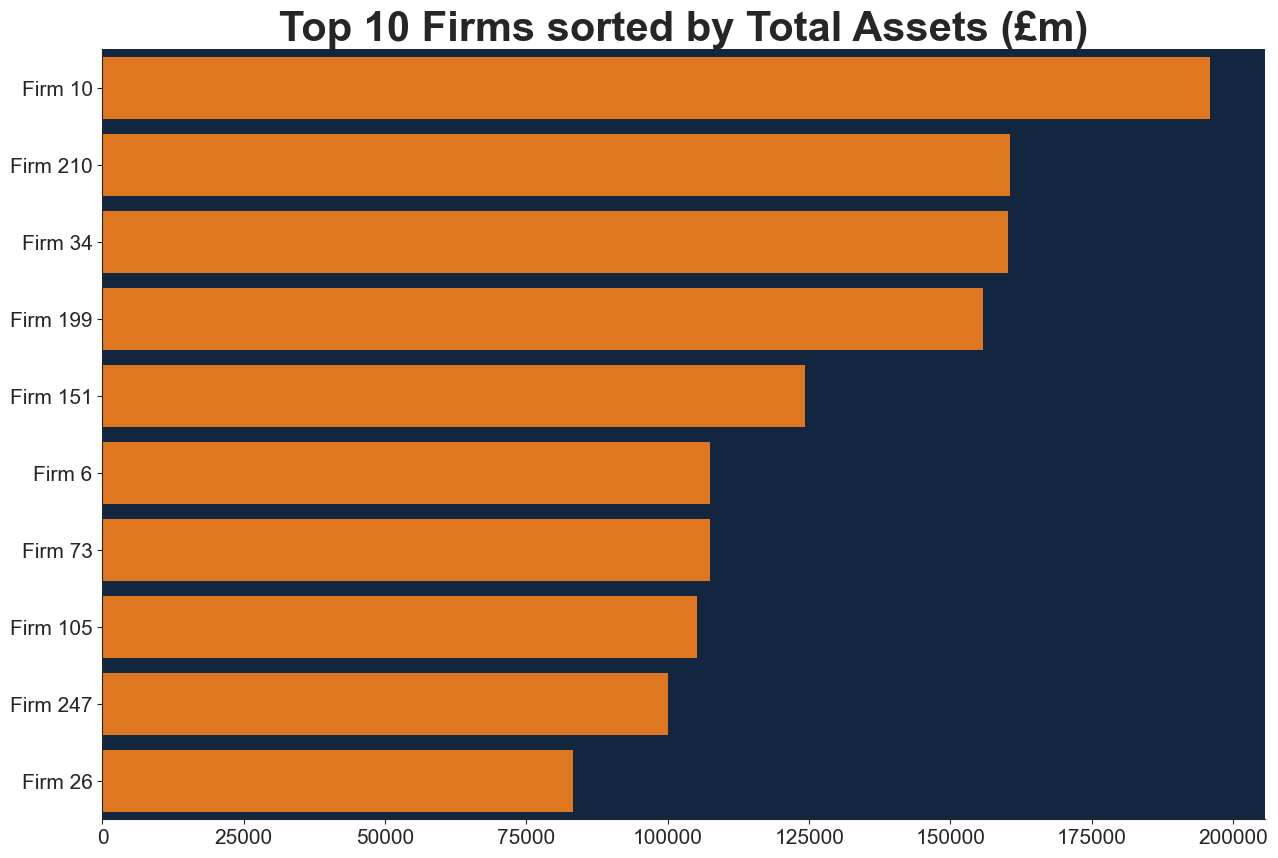

In [19]:
# filter on the top 10 firms by total assets
top_10_total_assets = latest_year_data_assets.sort_values("Value", ascending=False).head(10)

# set plot size
plt.rcParams['figure.figsize'] = [15, 10]

# creating the barplot
sns.set_style("ticks")
sns.axes_style("white")
chart = sns.barplot(data = top_10_total_assets,
                        y="Firm Name", 
                        x="Value",
                        color="#FF7300",
                        dodge=False,
                        edgecolor="none")

chart.set_facecolor("#12273F")

# remove axis labels and instead add title to describe the chart
plt.ylabel("")
plt.xlabel("")
plt.yticks(fontsize= 15)
plt.xticks(fontsize= 15)
chart.set_title("Top 10 Firms sorted by Total Assets (£m)",fontsize= 30, fontweight="bold")

sns.despine()
plt.show()

So the above chart shows that Firm 10 is the largest as of the latest date along with the 9 other firms in the top 10, and it shows the differences between the top 10 too 

### Changing Business profile

Here I am going to need to find the firms who are seeing the most change in their business profile

I will look at which firms see the most growth for 4 different metrics

* Gross Written Premium

* Net Written premium / Gross Written Premium 

* Solvency Capital Requirement

* Net Combined Ratio


#

In [20]:
# filter the data on required metrics then pivot wider by metric so that a new metric can be calculated
business_profile_metric_wide = df_all_data.query('Metric in ["GWP (£m)","NWP (£m) ", "SCR coverage ratio", "Net combined ratio"]').pivot_table(
    index=["Firm Name","Year"],
    columns="Metric", 
    values="Value",
    fill_value=0).reset_index().rename_axis(None, axis = 1)

# calculate the new metric
business_profile_metric_wide["NWP / GWP"] = business_profile_metric_wide["NWP (£m) "] / business_profile_metric_wide["GWP (£m)"]

# drop the metric that was used to calculate the new metric
business_profile_metric_wide.drop("NWP (£m) ", axis=1, inplace=True)

# view the data
business_profile_metric_wide

Firm Name       Year     GWP (£m)  Net combined ratio  \
0       Firm 1 2016-01-01     0.000000            0.000000   
1       Firm 1 2017-01-01     0.000000            0.000000   
2      Firm 10 2016-01-01   678.223770            0.795576   
3      Firm 10 2017-01-01  9887.800616            1.145839   
4      Firm 10 2018-01-01  9002.108895            0.493554   
...        ...        ...          ...                 ...   
1835   Firm 99 2016-01-01   178.699850            0.000000   
1836   Firm 99 2017-01-01   557.712342            0.000000   
1837   Firm 99 2018-01-01   421.335272            0.000000   
1838   Firm 99 2019-01-01   932.918985            0.000000   
1839   Firm 99 2020-01-01   465.685458            0.000000   

      SCR coverage ratio  NWP / GWP  
0           1.625197e-01        NaN  
1           5.588700e+07        NaN  
2           1.249246e+00   0.595845  
3           6.691805e-01   0.392614  
4           1.957921e+00   0.737653  
...                  ...        ...  
1835        2.142808e+00   1.574721  
1836        1.211951e+00   0.216528  
1837        7.536688e-01   0.731846  
1838        2.059566e-01   0.120085  
1839        2.503271e+00   0.306011  

[1840 rows x 6 columns]

In [21]:
# now pivot back to a long format and remove any NaN
business_profile_data = pd.melt(business_profile_metric_wide, id_vars=["Firm Name", "Year"], var_name="Metric", value_name="Value").query('Value.notnull()')
business_profile_data

Firm Name       Year     Metric        Value
0       Firm 1 2016-01-01   GWP (£m)     0.000000
1       Firm 1 2017-01-01   GWP (£m)     0.000000
2      Firm 10 2016-01-01   GWP (£m)   678.223770
3      Firm 10 2017-01-01   GWP (£m)  9887.800616
4      Firm 10 2018-01-01   GWP (£m)  9002.108895
...        ...        ...        ...          ...
7355   Firm 99 2016-01-01  NWP / GWP     1.574721
7356   Firm 99 2017-01-01  NWP / GWP     0.216528
7357   Firm 99 2018-01-01  NWP / GWP     0.731846
7358   Firm 99 2019-01-01  NWP / GWP     0.120085
7359   Firm 99 2020-01-01  NWP / GWP     0.306011

[6613 rows x 4 columns]

As was the case with the total assets data there are lots of 0's in the latest year, so I will again assume that this means the firm is either no longer reporting the metric or no longer authorised
- i will therefore remove 0's
- then for each metric i will calculate the year on year percentage change for each firm

In [22]:
# filter on metrics and filter out 0's 
business_profile_data = business_profile_data.query('Value != 0').sort_values(["Firm Name", "Metric", "Year"])


# to ensure I am only ever calculating year on year change i need to fill in gaps with NaN as otherwise if a firm report for one year then nothing the next and then they report again the code will calculate the 2 year change
# to do this I pivot wider adding in na for cases there is no number then pivot back to long
business_profile_year_wide = business_profile_data.pivot_table(
    index=["Firm Name","Metric"],
    columns="Year", 
    values="Value",
    fill_value=np.nan).reset_index().rename_axis(None, axis = 1)

# pivot back to the long format to calcualte the percentage changes and sort by firm then metric then year 
business_profile_data  = pd.melt(business_profile_year_wide, id_vars=["Firm Name", "Metric"], var_name="Year", value_name="Value").sort_values(["Firm Name", "Metric", "Year"])

# group by the firms and metric and then calculate percentage change for the value
business_profile_data["Change"] = business_profile_data.groupby(["Firm Name", "Metric"])[["Value"]].pct_change()

# view the data
business_profile_data 

C:\Users\332223\AppData\Local\Temp\ipykernel_27684\1312155240.py:17: FutureWarning: The default fill_method='ffill' in DataFrameGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  business_profile_data["Change"] = business_profile_data.groupby(["Firm Name", "Metric"])[["Value"]].pct_change()


Firm Name              Metric                 Year         Value  \
0       Firm 1  SCR coverage ratio  2016-01-01 00:00:00  1.625197e-01   
1061    Firm 1  SCR coverage ratio  2017-01-01 00:00:00  5.588700e+07   
2122    Firm 1  SCR coverage ratio  2018-01-01 00:00:00           NaN   
3183    Firm 1  SCR coverage ratio  2019-01-01 00:00:00           NaN   
4244    Firm 1  SCR coverage ratio  2020-01-01 00:00:00           NaN   
...        ...                 ...                  ...           ...   
1060   Firm 99  SCR coverage ratio  2016-01-01 00:00:00  2.142808e+00   
2121   Firm 99  SCR coverage ratio  2017-01-01 00:00:00  1.211951e+00   
3182   Firm 99  SCR coverage ratio  2018-01-01 00:00:00  7.536688e-01   
4243   Firm 99  SCR coverage ratio  2019-01-01 00:00:00  2.059566e-01   
5304   Firm 99  SCR coverage ratio  2020-01-01 00:00:00  2.503271e+00   

            Change  
0              NaN  
1061  3.438784e+08  
2122  0.000000e+00  
3183  0.000000e+00  
4244  0.000000e+00  
...            ...  
1060           NaN  
2121 -4.344099e-01  
3182 -3.781360e-01  
4243 -7.267280e-01  
5304  1.115436e+01  

[5305 rows x 5 columns]

Next I need to remove the rows where change is NaN and then plot the percentage change values over time for each metric to view the largest moving firms

In [23]:
business_profile_data_no_null = business_profile_data.query('Change.notnull()')

# view the data
business_profile_data_no_null.sort_values("Change", ascending=False)

Firm Name              Metric                 Year         Value  \
1437  Firm 216  SCR coverage ratio  2017-01-01 00:00:00  9.993029e+08   
1155  Firm 131  SCR coverage ratio  2017-01-01 00:00:00  9.269834e+08   
1061    Firm 1  SCR coverage ratio  2017-01-01 00:00:00  5.588700e+07   
3075   Firm 66  SCR coverage ratio  2018-01-01 00:00:00  7.161992e+06   
4501  Firm 185           NWP / GWP  2020-01-01 00:00:00  1.638684e-01   
...        ...                 ...                  ...           ...   
1575  Firm 257  Net combined ratio  2017-01-01 00:00:00  1.057018e+02   
1953   Firm 49  Net combined ratio  2017-01-01 00:00:00 -5.568479e+00   
2837  Firm 316            GWP (£m)  2018-01-01 00:00:00  2.966754e+01   
3201  Firm 105           NWP / GWP  2019-01-01 00:00:00  1.152999e+00   
1976   Firm 55           NWP / GWP  2017-01-01 00:00:00  4.033321e+02   

            Change  
1437  4.696972e+08  
1155  3.655549e+08  
1061  3.438784e+08  
3075  1.333856e+06  
4501  1.905779e+05  
...            ...  
1575 -4.407033e+02  
1953 -5.808944e+02  
2837 -1.086465e+03  
3201 -1.149246e+03  
1976 -4.692299e+03  

[4050 rows x 5 columns]

Some Values seem to high for a percentage change so I will filter the wide format dataframe to view the time series for the movements over 1000%

In [24]:
firms_over_1000 = business_profile_data_no_null.query("Change >= 1000")
firms_over_1000

Firm Name              Metric                 Year         Value  \
1061    Firm 1  SCR coverage ratio  2017-01-01 00:00:00  5.588700e+07   
1155  Firm 131  SCR coverage ratio  2017-01-01 00:00:00  9.269834e+08   
4501  Firm 185           NWP / GWP  2020-01-01 00:00:00  1.638684e-01   
1437  Firm 216  SCR coverage ratio  2017-01-01 00:00:00  9.993029e+08   
1635  Firm 276            GWP (£m)  2017-01-01 00:00:00  8.618096e+02   
3075   Firm 66  SCR coverage ratio  2018-01-01 00:00:00  7.161992e+06   

            Change  
1061  3.438784e+08  
1155  3.655549e+08  
4501  1.905779e+05  
1437  4.696972e+08  
1635  5.454003e+04  
3075  1.333856e+06

In [25]:
# filter the data on required metrics then pivot wider by date - to be used later
business_profile_data_wide = business_profile_data.pivot_table(
    index=["Firm Name","Metric"],
    columns="Year", 
    values="Value",
    fill_value=0).reset_index().rename_axis(None, axis = 1)

business_profile_data_wide.query('((`Firm Name` in ["Firm 216", "Firm 131", "Firm 1", "Firm 66"]) & (Metric == "SCR coverage ratio"))|((`Firm Name` == "Firm 185") & (Metric == "NWP / GWP"))|((`Firm Name` == "Firm 276") & (Metric == "GWP (£m)"))')

Firm Name              Metric  2016-01-01 00:00:00  2017-01-01 00:00:00  \
0      Firm 1  SCR coverage ratio             0.162520         5.588700e+07   
94   Firm 131  SCR coverage ratio             2.535825         9.269834e+08   
257  Firm 185           NWP / GWP             0.000000         0.000000e+00   
376  Firm 216  SCR coverage ratio             2.127547         9.993029e+08   
574  Firm 276            GWP (£m)             0.015801         8.618096e+02   
953   Firm 66  SCR coverage ratio             2.715495         5.369387e+00   

     2018-01-01 00:00:00  2019-01-01 00:00:00  2020-01-01 00:00:00  
0           0.000000e+00             0.000000             0.000000  
94          0.000000e+00             0.000000             0.000000  
257         8.598452e-07             0.000000             0.163868  
376         0.000000e+00             0.000000             0.000000  
574         9.830576e+03          5385.561561          5587.206834  
953         7.161992e+06             0.000000             0.000000

For most of these large movements the data stops before the current quarter so I will assume they are no longer reported. The only metric consistently reported by a firm with a very large movement is GWP by Firm 276 here the 2016 value does appear as an outlier so should be removed

Values where the firm didnt report in the most recent three years will be removed as without this data you cant tell if values are increasing or not

Firm 185's nwp/gwp will also be removed given the gaps in the time series

In [26]:
# pivot the change data wider then remove the required rows and pivot back to long

business_profile_data_no_null.drop("Value", axis=1, inplace=True)

# convert to absolute value of change 
business_profile_data_no_null["Change"] = business_profile_data_no_null["Change"].abs()


business_profile_data_change_wide = business_profile_data_no_null.pivot_table(
    index=["Firm Name","Metric"],
    columns="Year", 
    values="Change",
    fill_value=0).reset_index().rename_axis(None, axis = 1)


C:\Users\332223\AppData\Local\Temp\ipykernel_27684\2829984411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business_profile_data_no_null.drop("Value", axis=1, inplace=True)
C:\Users\332223\AppData\Local\Temp\ipykernel_27684\2829984411.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business_profile_data_no_null["Change"] = business_profile_data_no_null["Change"].abs()


In [27]:
# filter out the specific cases of outliers
business_profile_data_change_wide = business_profile_data_change_wide.query("~(((`Firm Name` == 'Firm 276')&(Metric == 'GWP (£m)'))|((`Firm Name` == 'Firm 185')&(Metric == 'NWP / GWP')))") 

# filter out the 0's for last two periods of
business_profile_data_change_wide = business_profile_data_change_wide.query("(`2020-01-01 00:00:00`!= 0)&(`2019-01-01 00:00:00`!= 0)")

# now calculating the average absolute percentage change to see firms that have seen the most movement for paticular metrics on average over the time period
business_profile_data_change_wide["Average Change"] =  business_profile_data_change_wide.mean(axis=1,numeric_only=True)

#viewing the data
business_profile_data_change_wide

Firm Name              Metric  2017-01-01 00:00:00  2018-01-01 00:00:00  \
1      Firm 10            GWP (£m)            13.578965             0.089574   
2      Firm 10           NWP / GWP             0.341080             0.878826   
3      Firm 10  Net combined ratio             0.440263             0.569264   
4      Firm 10  SCR coverage ratio             0.464333             1.925850   
5     Firm 100            GWP (£m)             1.469117             0.514255   
...        ...                 ...                  ...                  ...   
1055   Firm 97  Net combined ratio             0.770805             0.866267   
1056   Firm 97  SCR coverage ratio             0.512995             2.405974   
1058   Firm 99            GWP (£m)             2.120945             0.244529   
1059   Firm 99           NWP / GWP             0.862498             2.379920   
1060   Firm 99  SCR coverage ratio             0.434410             0.378136   

      2019-01-01 00:00:00  2020-01-01 00:00:00  Average Change  
1                0.172235             0.916373        3.689287  
2                0.332410             0.489189        0.510376  
3                2.060302             0.950529        1.005090  
4                0.432034             0.461538        0.820939  
5                0.908135             5.938990        2.207624  
...                   ...                  ...             ...  
1055             0.507415             1.439593        0.896020  
1056             0.595071             0.985026        1.124767  
1058             1.214196             0.500830        1.020125  
1059             0.835914             1.548283        1.406654  
1060             0.726728            11.154360        3.173409  

[817 rows x 7 columns]

For each metric I am going to look at the firms with the top 10 values for average change and plot their data using the time_series function below

In [28]:
# time series function

def time_series(data_frame, metric, ranking_data_frame, percentile, axis_percentage = True):
    '''
    INPUTS:
        data_frame - pandas dataframe - the data to plot
        metric - string - the metric to include on the plot
        ranking_data_frame - pandas dataframe - contains the average % change information
        percentile - int - the top x firms should be plotted
        axis_percentage - boolean - should the axis be formatted as a %

    OUTPUTS:
        plot -  a time series chart of the firms created using seaborn
    '''
    firms = ranking_data_frame.query("Metric == @metric").sort_values("Average Change", ascending=False).head(percentile)["Firm Name"].to_list()

    data_frame = data_frame.query("(`Firm Name` in @firms)&(Metric == @metric)")

    plt.rcParams['figure.figsize'] = [30, 10]
    sns.set(font_scale=2) # font size
    sns.set_style("ticks") # style
    ax = sns.lineplot(x="Year", 
                        y="Value",
                        hue="Firm Name",
                        errorbar=None, 
                        data = data_frame, 
                        linewidth =8)
    # converting the y axis to %
    if axis_percentage:                    
        vals = ax.get_yticks()
        ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    ax.set_facecolor('#12273F') # backgound colour

    # removing axis titles and adding chart title
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title( metric + "\n" + "Top " + str(percentile) + " Firms", fontsize =35, fontweight="bold")
    ax.grid(axis='y')

    # showing the plot
    sns.despine()
    plt.show()
    




C:\Users\332223\AppData\Local\Temp\ipykernel_27684\3809471248.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


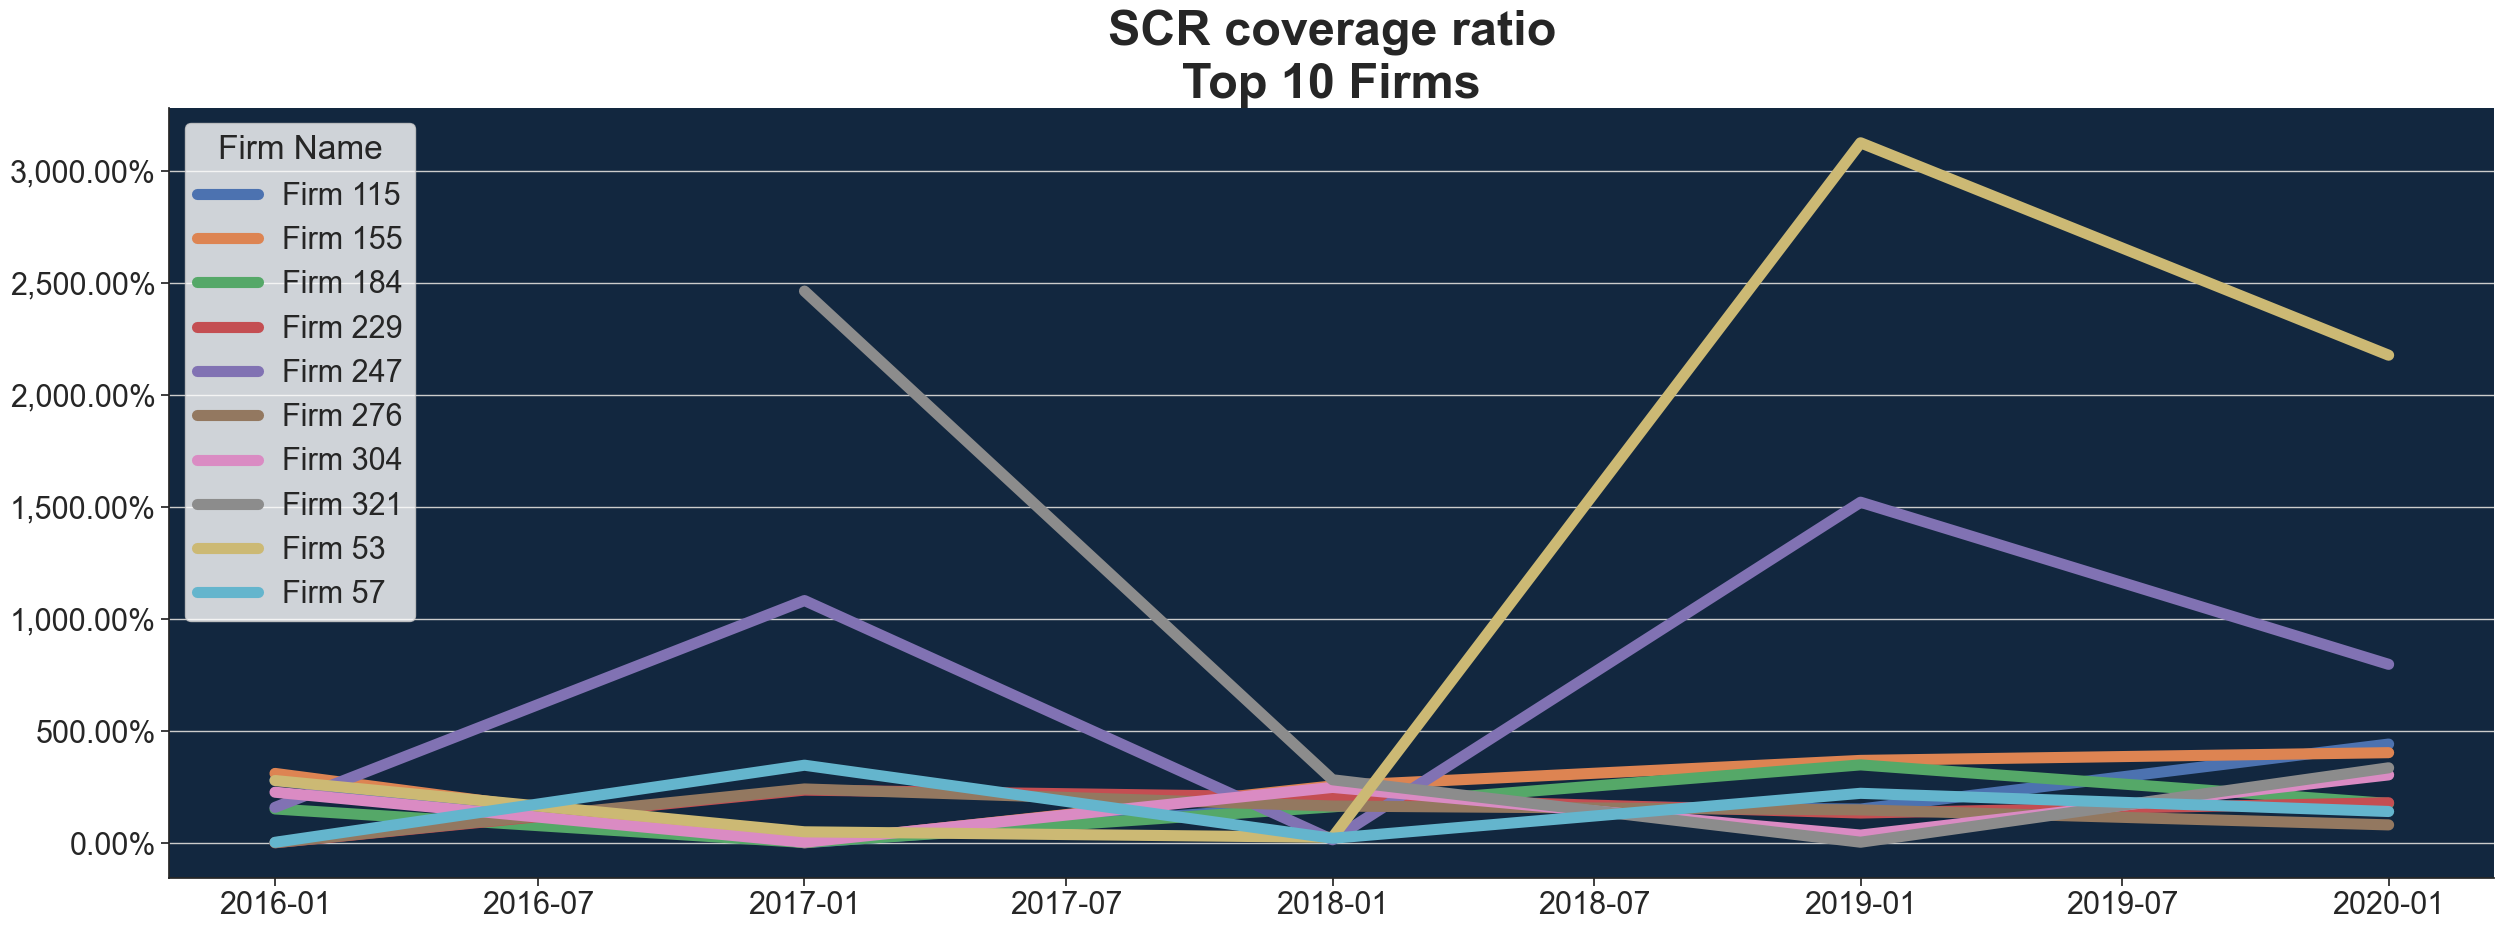

In [29]:
# using function to produce chart for SCR
time_series(data_frame = business_profile_data,
metric = "SCR coverage ratio",
ranking_data_frame = business_profile_data_change_wide,
percentile = 10)

For SCR coverage the two largest growers appear to be firms 247 and 53, both could be reporting errors due to the size of the movments but they reported the large values 2 years in a row so its hard to say for sure

C:\Users\332223\AppData\Local\Temp\ipykernel_27684\3809471248.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


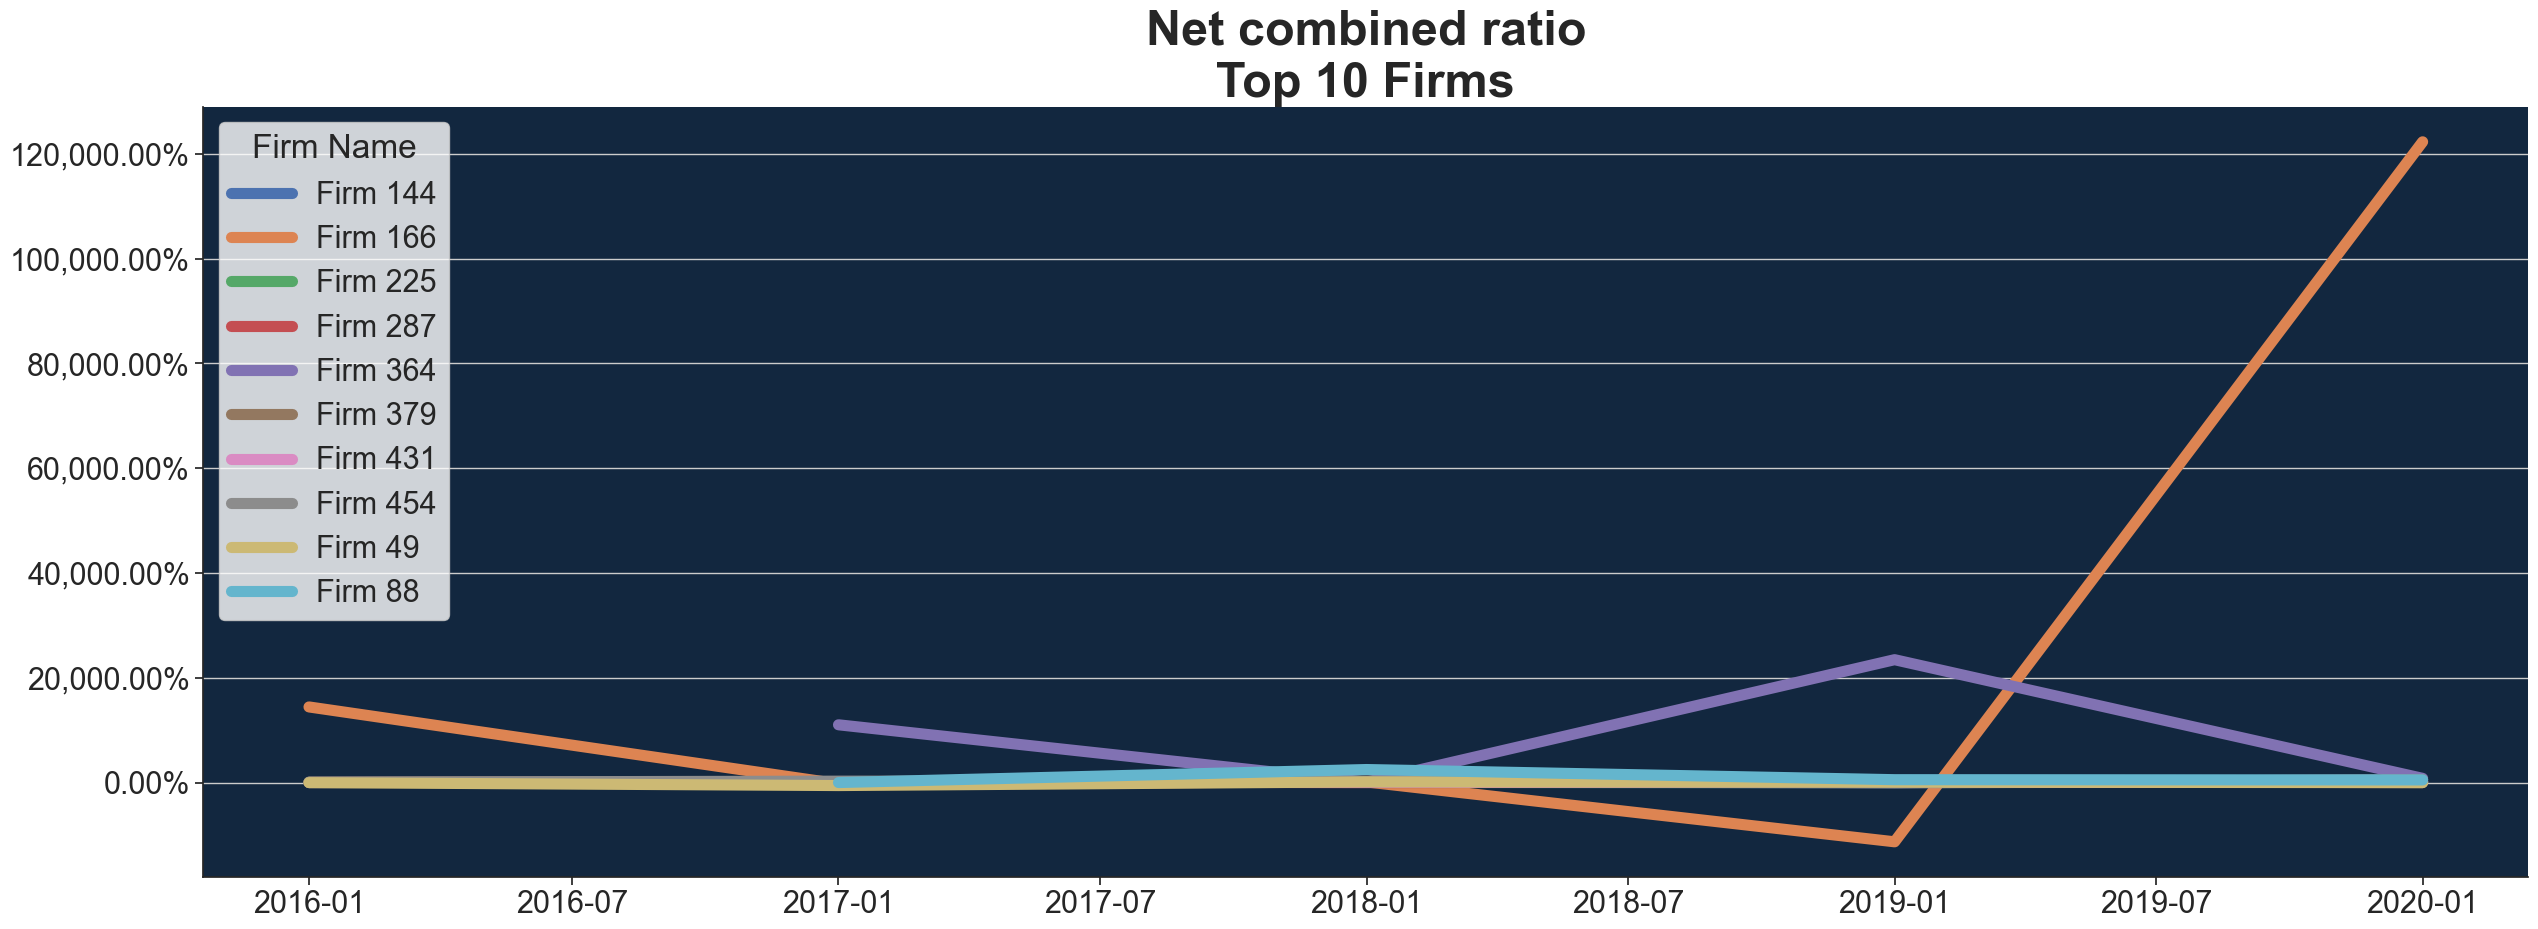

In [30]:
# using function to produce chart for Net combined ratio
time_series(data_frame = business_profile_data,
metric = "Net combined ratio",
ranking_data_frame = business_profile_data_change_wide,
percentile = 10)

For net combined ratio firm 166 is the biggest increase by a long distance, so much so that its hard to see other firms, it looks at though the firms data could be a reporting error so I am removing it and re generating the chart
After creating the chart again it was clear firm 364 was causing the same issue so they were removed too

C:\Users\332223\AppData\Local\Temp\ipykernel_27684\3809471248.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


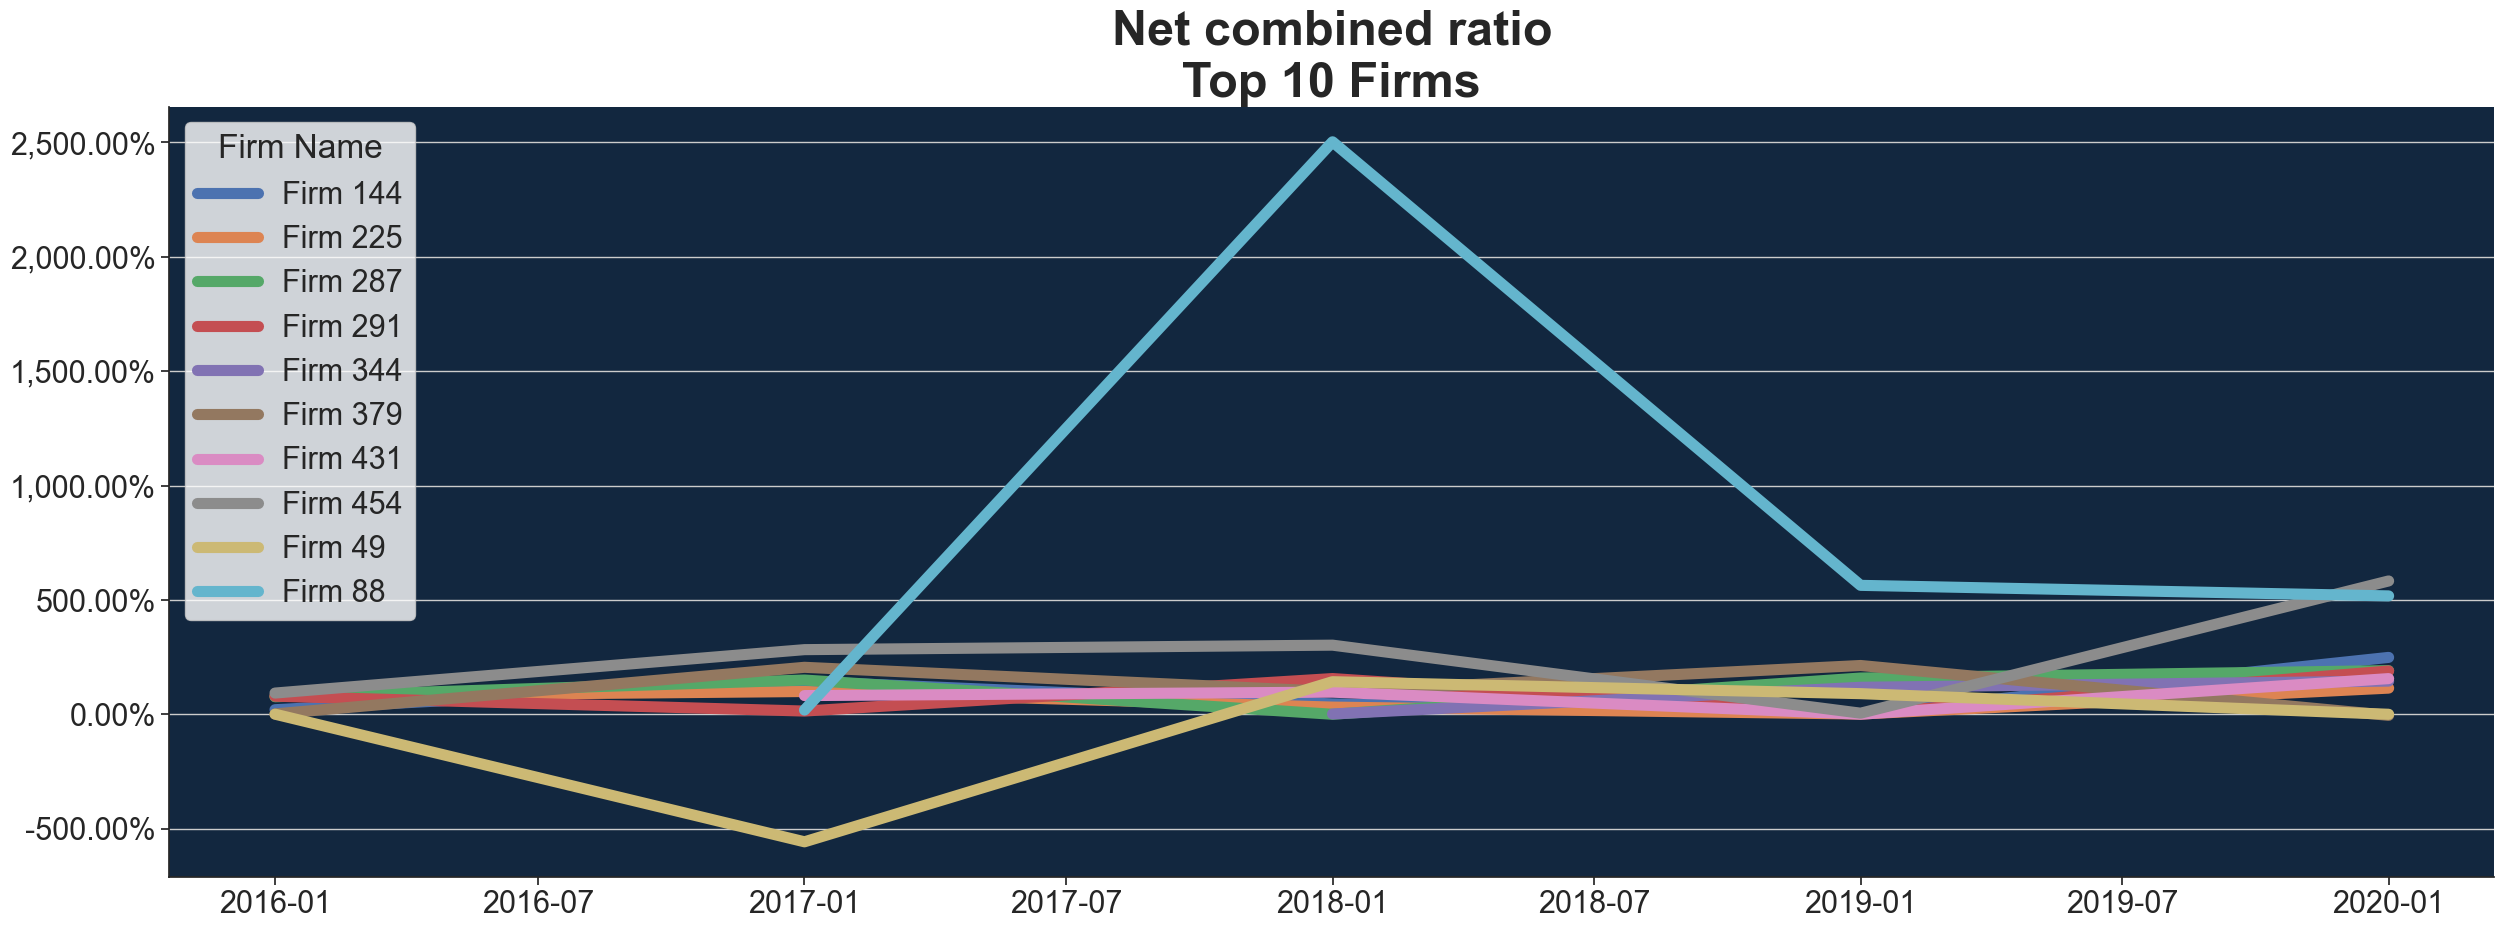

In [31]:
# using function to produce chart for Net combined ratio without firn 166

exclude_firms = business_profile_data.query('`Firm Name` not in ["Firm 166", "Firm 364"]')
exclude_firms_change = business_profile_data_change_wide.query('`Firm Name` not in ["Firm 166", "Firm 364"]')

time_series(data_frame = exclude_firms,
metric = "Net combined ratio",
ranking_data_frame = exclude_firms_change,
percentile = 10)

Now the rest of the data is more readible, its hard to say for sure if firms 166 and 364 are large movements or errors without asking the firms but of the rest of the firms Firm 88 so the largest change but then a fall again to 2019 with firm 454 seeing the largest increase since 2019

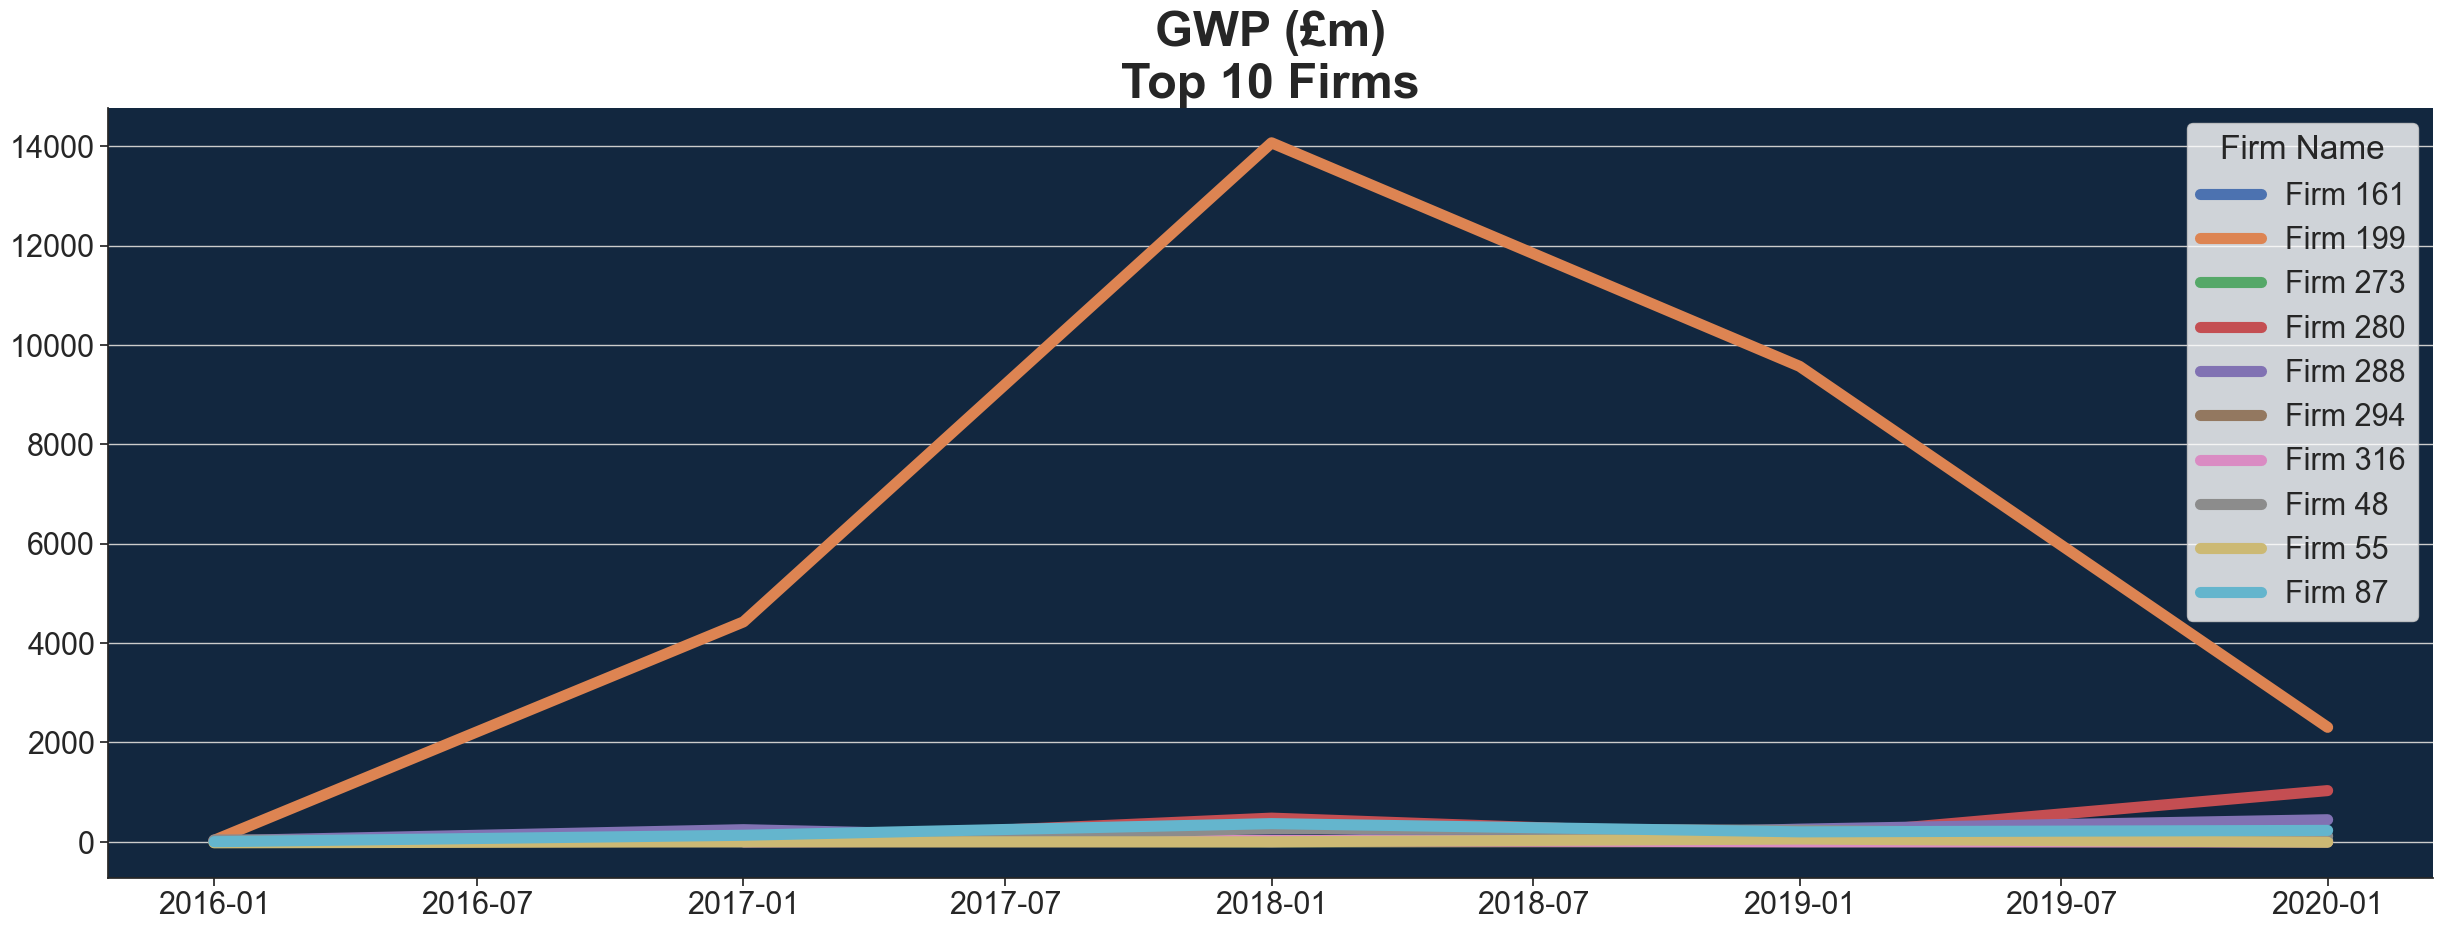

In [32]:
# using function to produce chart for GWP
time_series(data_frame = business_profile_data,
metric = "GWP (£m)",
ranking_data_frame = business_profile_data_change_wide,
percentile = 10,
axis_percentage = False)

Firm 199 saw the largest increase from 2016 to 2018 but then saw a sharp fall to 2020 - the firm makes it hard to see any other firms movement so will be removed and the chart created again

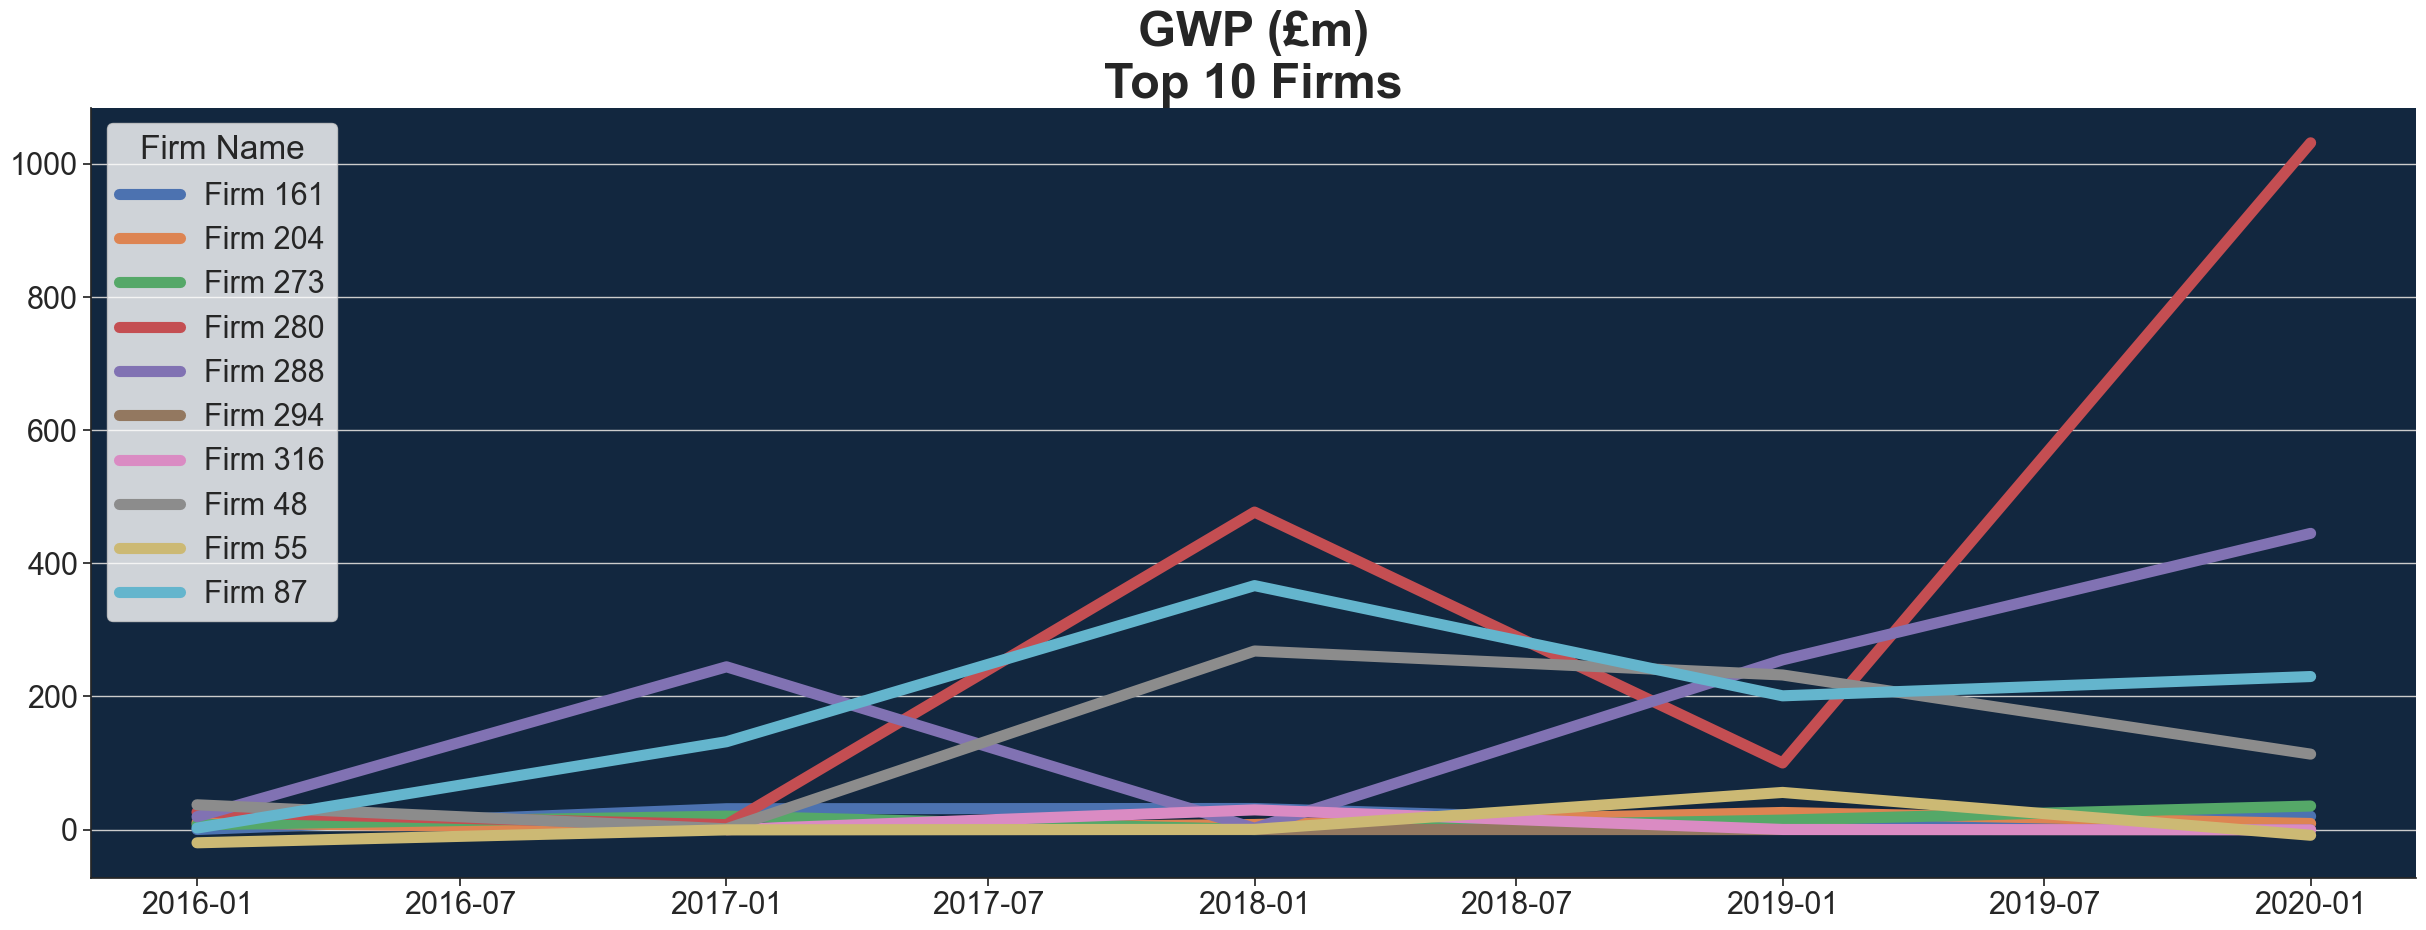

In [33]:
# using function to produce chart for GWP without firn 199

exclude_firms = business_profile_data.query('`Firm Name` not in ["Firm 199"]')
exclude_firms_change = business_profile_data_change_wide.query('`Firm Name` not in ["Firm 199"]')

time_series(data_frame = exclude_firms,
metric = "GWP (£m)",
ranking_data_frame = exclude_firms_change,
percentile = 10,
axis_percentage = False)

With firm 199 removed its clear that firms 280 and 288 also saw large growth 

C:\Users\332223\AppData\Local\Temp\ipykernel_27684\3809471248.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


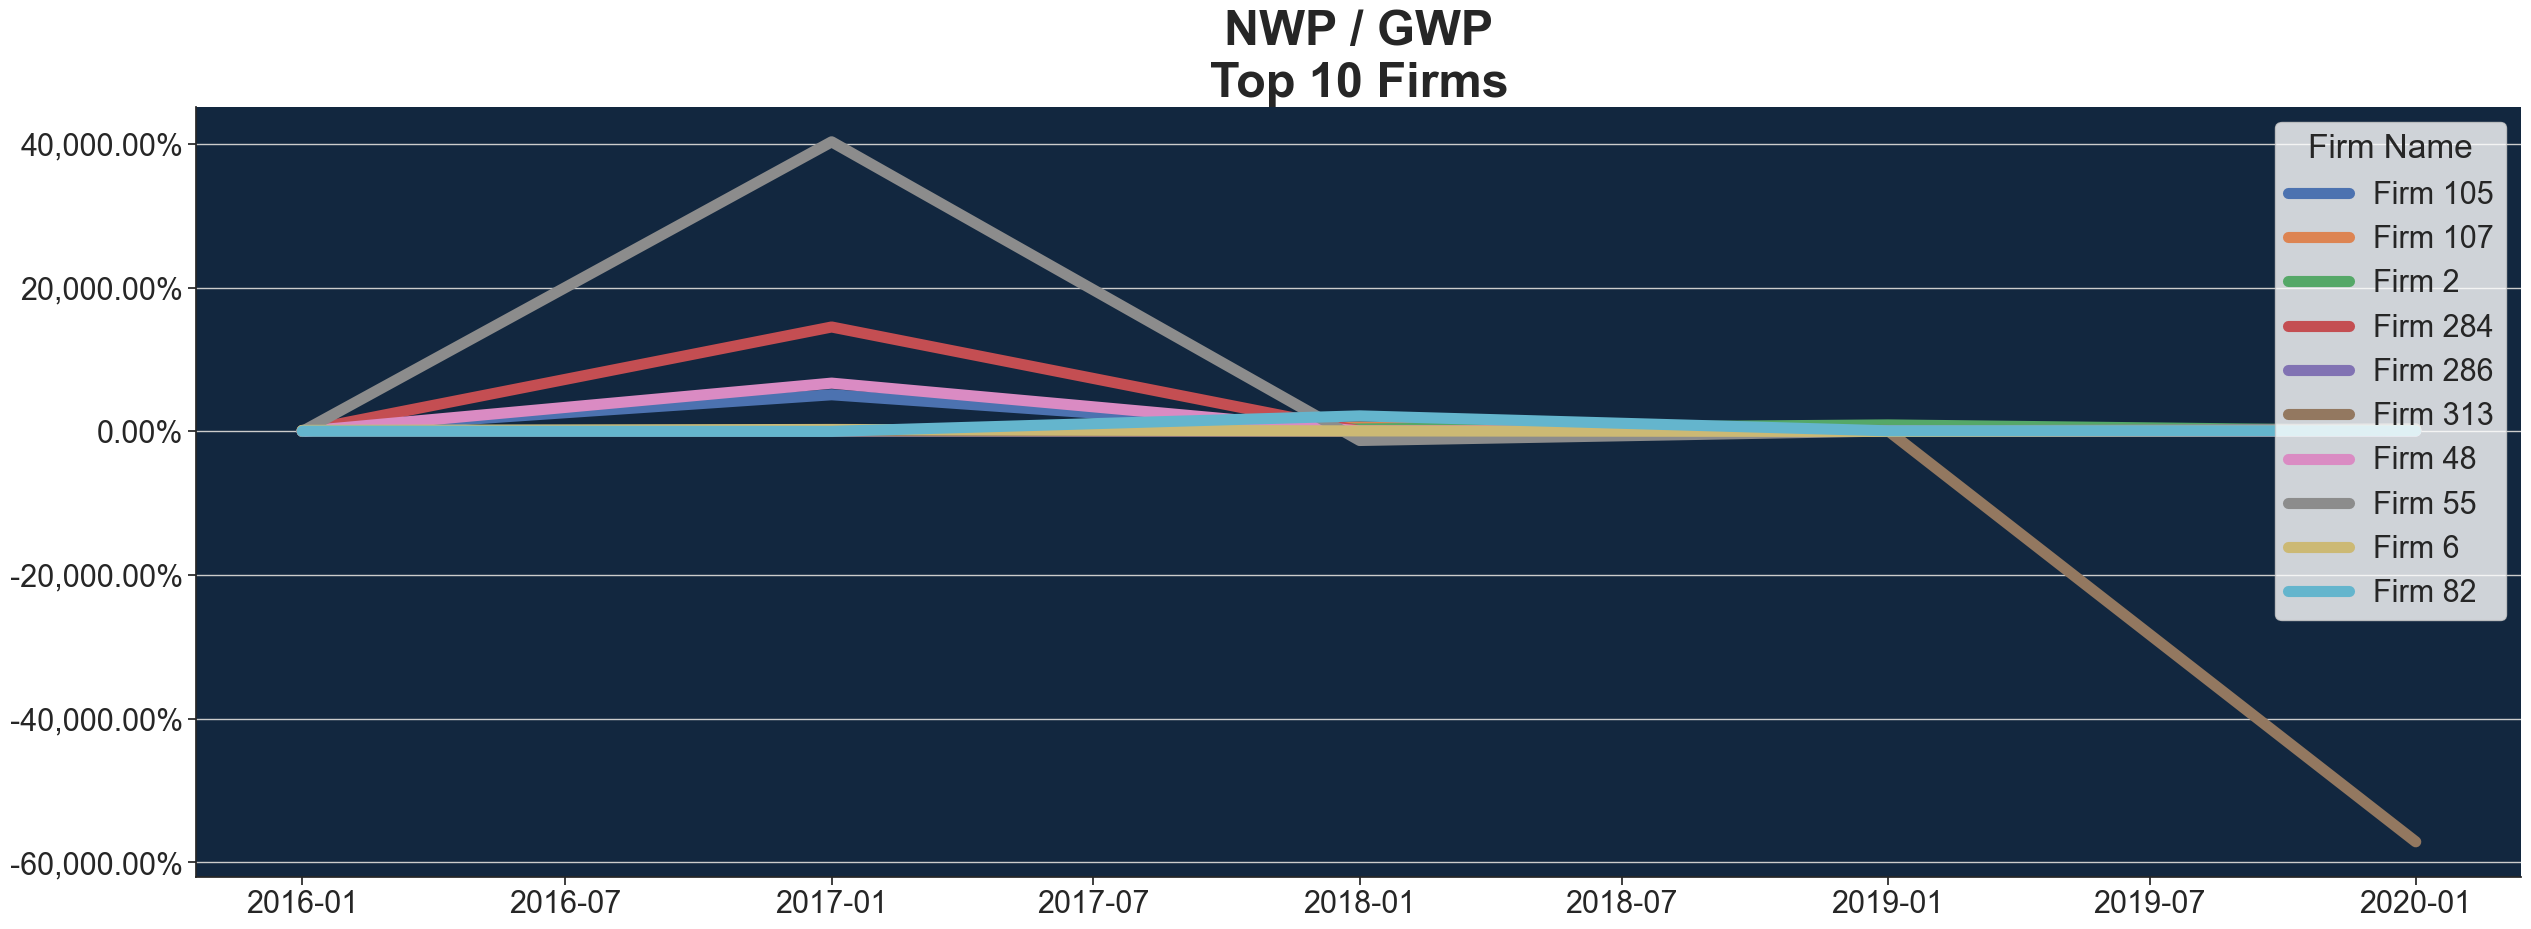

In [34]:
# using function to produce chart for NWP / GWP
time_series(data_frame = business_profile_data,
metric = "NWP / GWP",
ranking_data_frame = business_profile_data_change_wide,
percentile = 10)

Firm 313 saw a very large fall from 2019 to 2020, this looks like a potential reporting error but the firm would need to confirm this, therefore the chart will be produced again without them

C:\Users\332223\AppData\Local\Temp\ipykernel_27684\3809471248.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


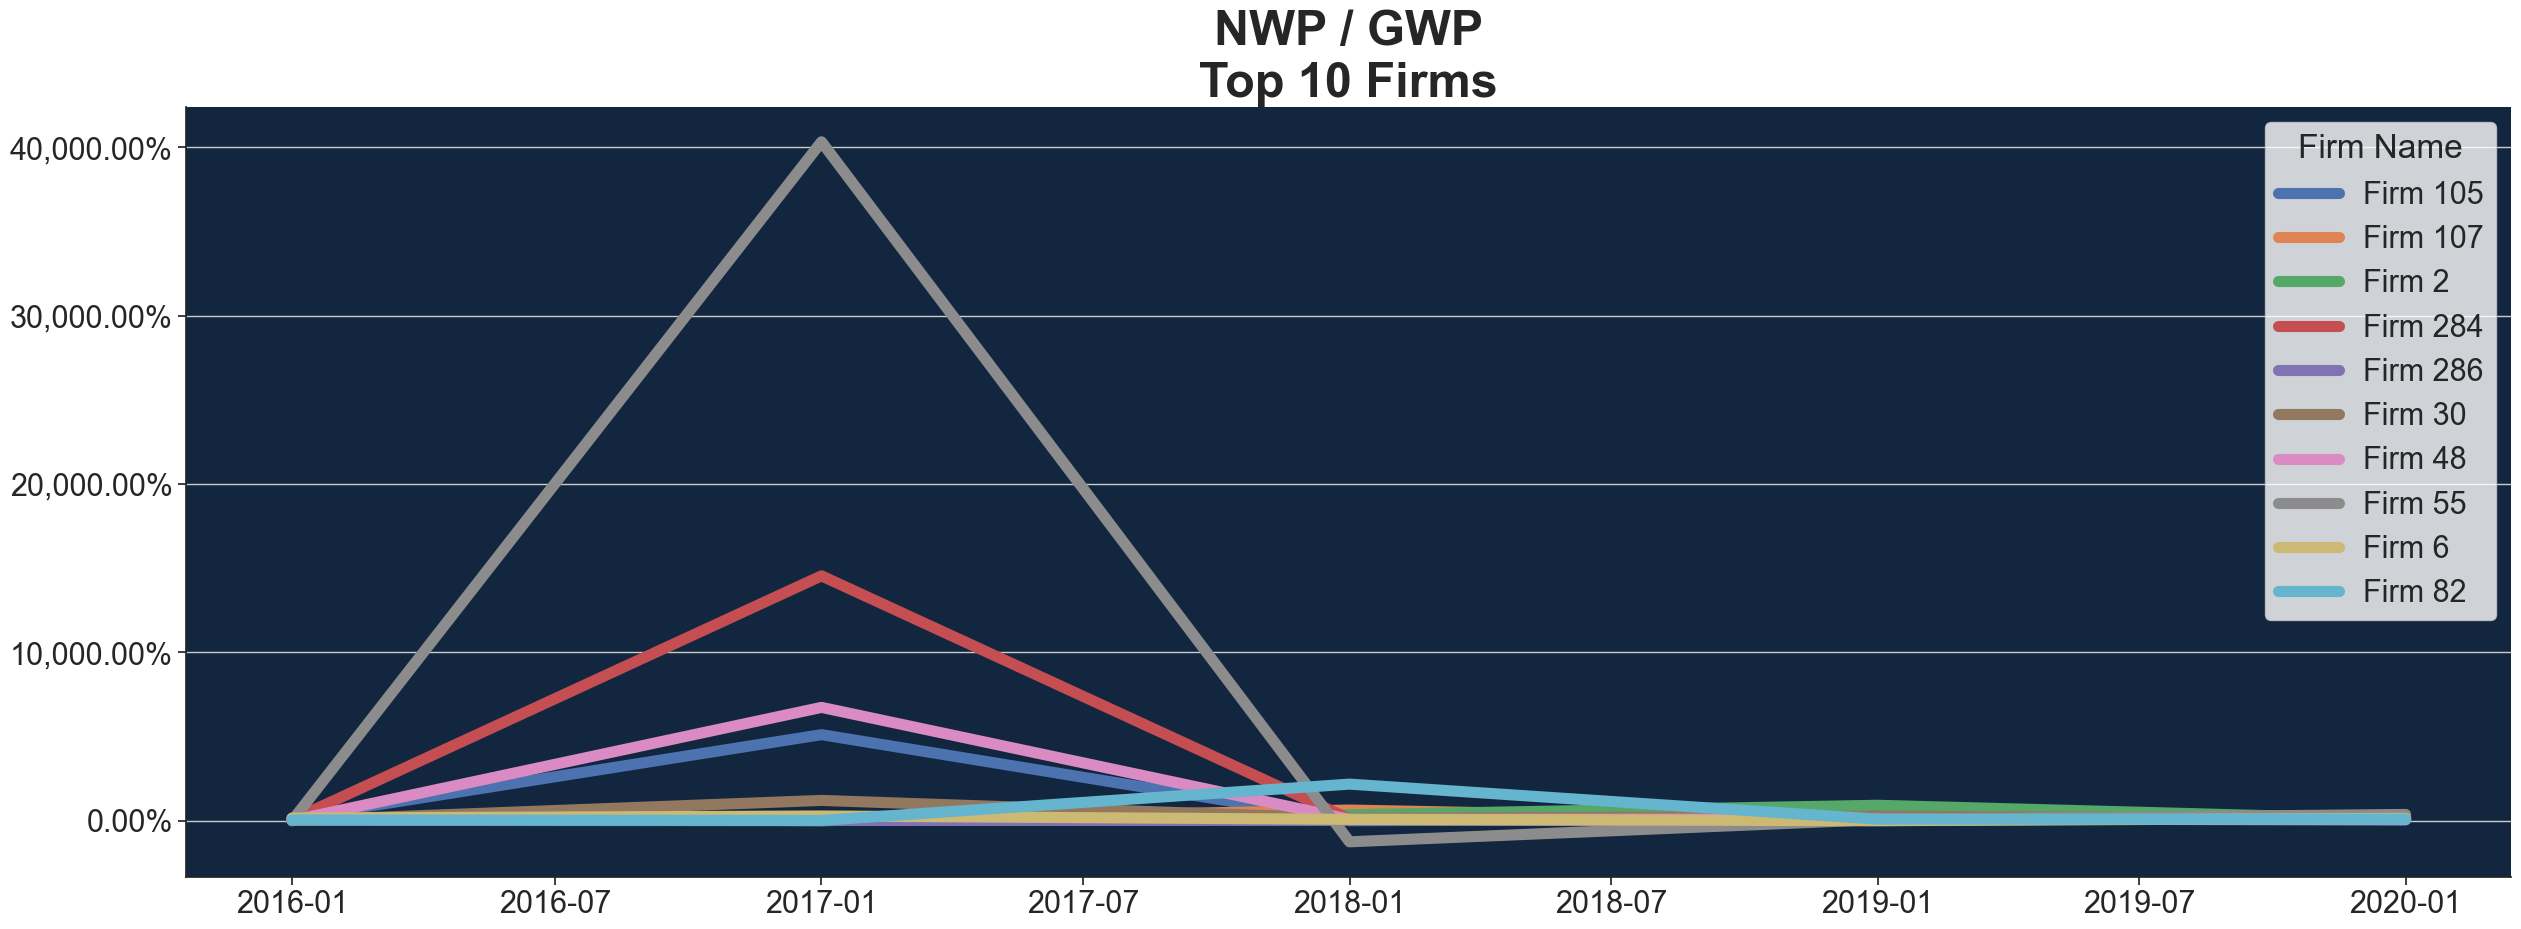

In [35]:
# using function to produce chart for NWP / GWP without firn 199

exclude_firms = business_profile_data.query('`Firm Name` not in ["Firm 313"]')
exclude_firms_change = business_profile_data_change_wide.query('`Firm Name` not in ["Firm 313"]')

time_series(data_frame = exclude_firms,
metric = "NWP / GWP",
ranking_data_frame = exclude_firms_change,
percentile = 10)

In [36]:
date_2018_filter = dt.datetime.strptime("2017-12-31", "%Y-%m-%d")
date_2018_filter

datetime.datetime(2017, 12, 31, 0, 0)

It is again hard to read the more recent movements in the chart so it will be produced again without data before 2018

C:\Users\332223\AppData\Local\Temp\ipykernel_27684\3809471248.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


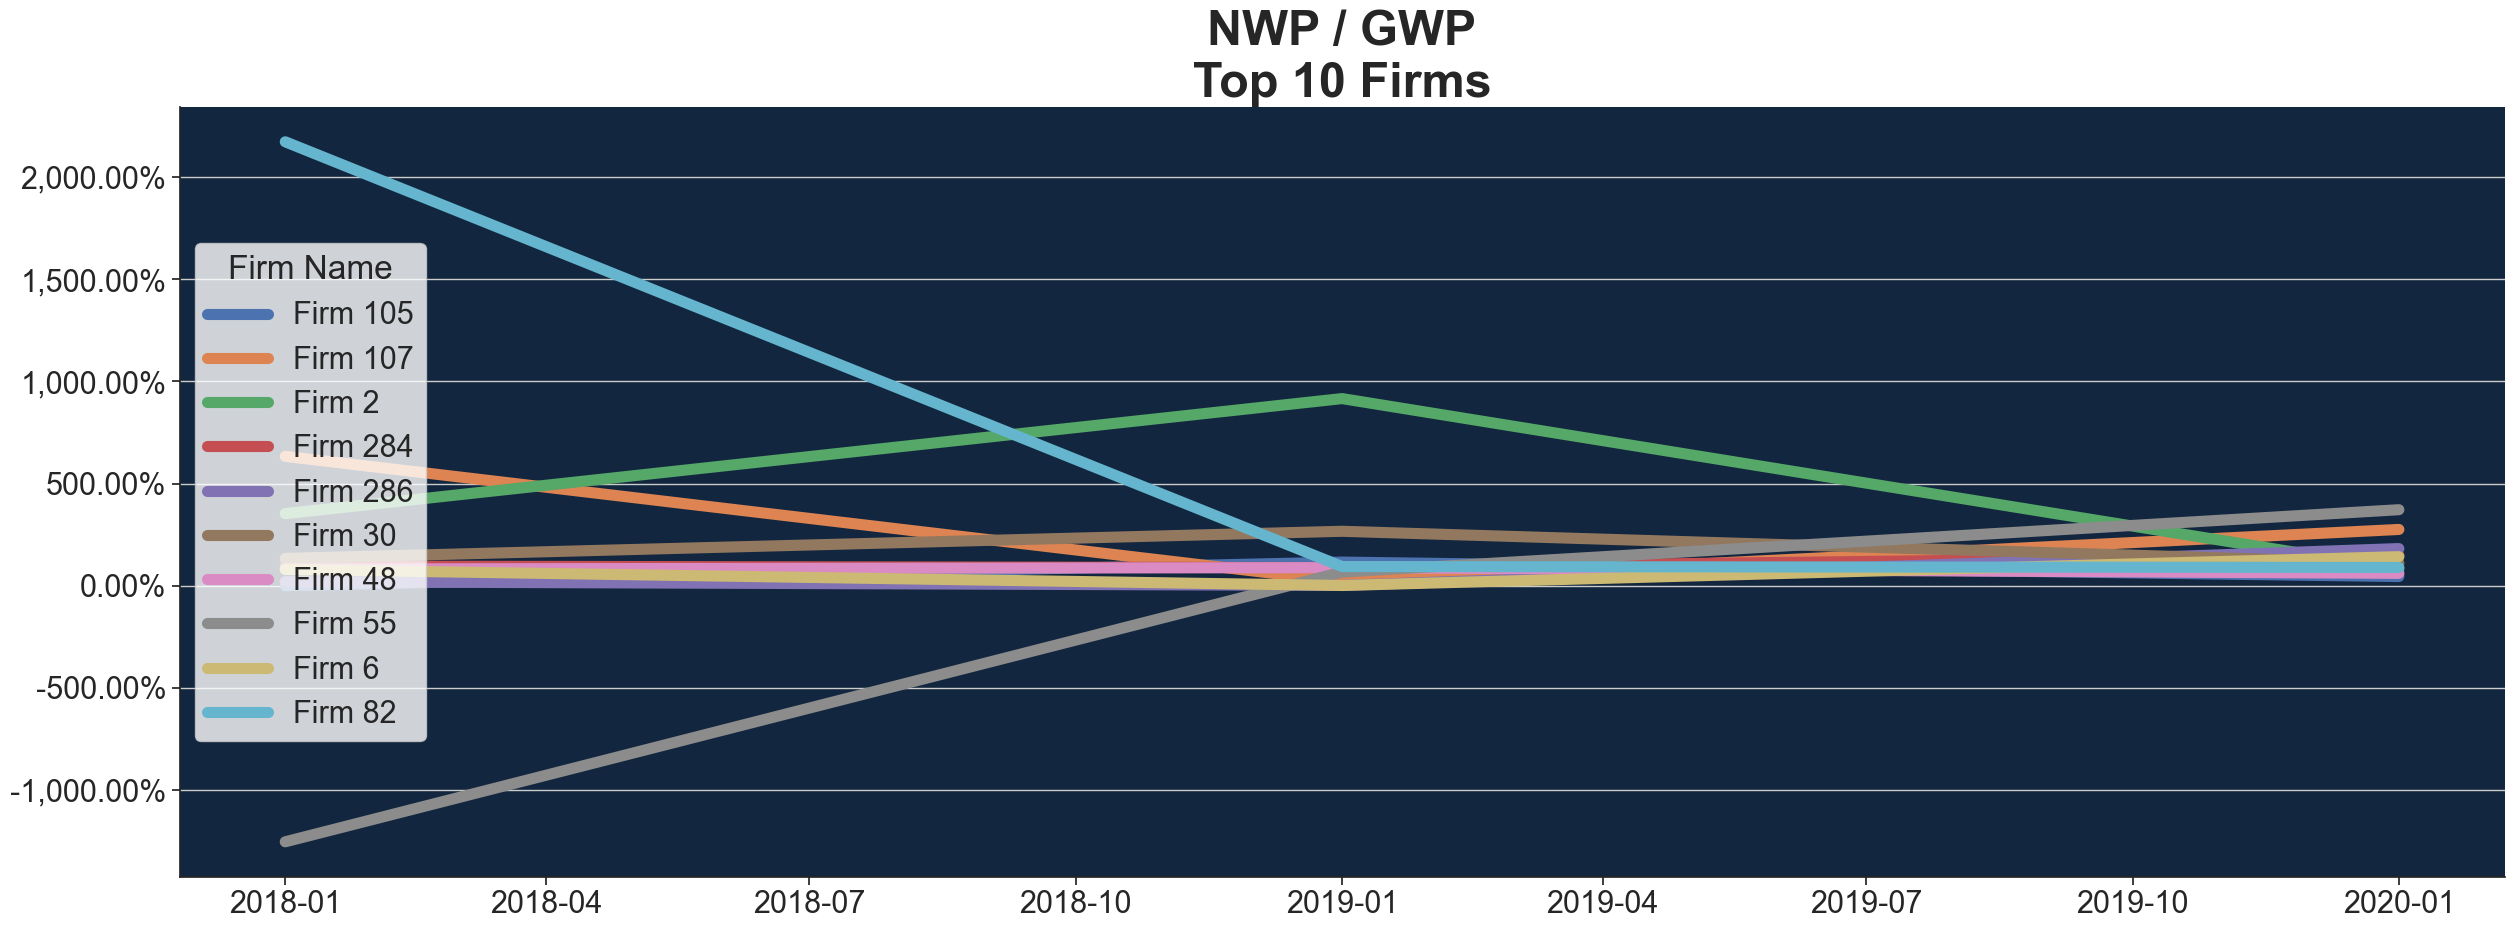

In [37]:
# using function to produce chart for NWP / GWP without firn 199
latest_date 

exclude_firms = business_profile_data.query('(`Firm Name` not in ["Firm 313"])& Year > @date_2018_filter')
exclude_firms_change = business_profile_data_change_wide.query('`Firm Name` not in ["Firm 313"]')

time_series(data_frame = exclude_firms,
metric = "NWP / GWP",
ranking_data_frame = exclude_firms_change,
percentile = 10)

It still doesnt appear the data has moved massively so the conclusion would be if firm 313s data is correct they have seen the most significant movement and that most of other firms data has been some what steady over the final 2 years

#### Conclusions
Having looked at these metrics no one firm stood out as being a larger movement for all the metrics. But for supervisors seeing that their firm is one of the largest movers for a singular metric would be important information that they would want to monitor

### Finding outliers in the data


Previously within the report I have detected outliers using z scores and also visually using charts in order to remove them but the below will use machine learning in order to more automatically remove potential outliers, focussing only on the latest data and finding outliers

The method i will use is an isolation forest which works using decision trees to recursively split the data up via branches, then it works out within a tree how far each point ends up fron the root and given its an ensemble method this process is repeated calcaultulting an average distance or anomlay score - Any negative value is considered an anomaly and the lower the score the more isolated the point and therefore the more likely its an outlier

#

In [38]:
# Shaping the data want only the latest years data for each firm with each metric as its own column
outlier_detection_data = df_all_data.query('(Year == @latest_date)').pivot_table(
    index=["Firm Name"],
    columns="Metric", 
    values="Value",
    fill_value=0).reset_index().rename_axis(None, axis = 1)

# viewing the reshaped data
outlier_detection_data

Firm Name  EoF for SCR (£m)  \
0     Firm 10       8207.819857   
1    Firm 100         65.980958   
2    Firm 102          0.000000   
3    Firm 103          7.256787   
4    Firm 104         30.990390   
..        ...               ...   
368   Firm 93          1.211513   
369   Firm 94          4.447145   
370   Firm 97         53.100282   
371   Firm 98          0.398893   
372   Firm 99         74.948404   

     Excess of assets over liabilities (£m) [= equity]     GWP (£m)  \
0                                          9062.225268   882.479158   
1                                            71.114779    29.951861   
2                                             0.000000     0.000000   
3                                             0.468301     0.000000   
4                                            60.000927  5256.831640   
..                                                 ...          ...   
368                                          52.726004     0.753979   
369                                           5.280394     0.000000   
370                                          30.446047     0.713196   
371                                          11.931532     0.000000   
372                                         245.321991   465.685458   

     Gross BEL (inc. TPs as whole, pre-TMTP) (£m)  Gross claims incurred (£m)  \
0                                      253.330250                  189.697324   
1                                      128.466329                  106.679797   
2                                       23.180702                  137.973399   
3                                        0.000000                    0.000000   
4                                        0.000000                    0.000000   
..                                            ...                         ...   
368                                      0.000000                    0.000000   
369                                    -19.367075                   10.799797   
370                                    214.909022                   90.356281   
371                                      0.000000                    0.000000   
372                                    162.688970                    2.191648   

     Gross combined ratio  Gross expense ratio    NWP (£m)   \
0                0.306303             0.374612   221.986516   
1                1.013963             0.299416    55.765640   
2                0.852866             1.085284     0.000000   
3                0.000000             0.000000     0.000000   
4                0.000000             0.000000  6174.582162   
..                    ...                  ...          ...   
368              0.000000             0.000000     1.230475   
369              0.219741             0.159026     0.000000   
370              0.981762             0.190320     3.255363   
371              0.000000             0.000000     0.000000   
372           2442.469233          1310.176452   142.505098   

     Net BEL (inc. TPs as a whole, pre-TMTP) (£m)  Net combined ratio  \
0                                      172.082595            0.074722   
1                                      231.680148            0.042478   
2                                      111.815615            1.677528   
3                                        0.000000            0.000000   
4                                        0.000000            0.000000   
..                                            ...                 ...   
368                                      0.000000            0.000000   
369                                      9.952436            0.125435   
370                                    174.220053            0.204209   
371                                      0.000000            0.000000   
372                                     28.539190            0.000000   

     Net expense ratio  Pure gross claims ratio  Pure net claims ratio  \
0             0.013781                 0.859655  

In [39]:
# the below function takes a metric from the user and returns the firms that are outliers based on the isolation forest algorithm

def find_outliers(dataframe, metric):
    '''
    INPUTS:
        dataframe: pandas dataframe containing the data
        metric: str for the metric you want to find, this must correspond to a column name in the dataframe

    OUTPUTS:
        data_to_return: pandas dataframe containing the outliers found by the isolationforest and the anomaly scores
    '''

    # exclude values that are 0 from process
    dataframe = dataframe.rename(columns={metric: "Metric"}) 

    dataframe = dataframe.query("Metric != 0")

    # initialise the forest
    col_to_fit = dataframe[["Metric"]]
    forest = IsolationForest(n_estimators= 120, contamination="auto", max_samples="auto", random_state=42)
    predictions = forest.fit_predict(col_to_fit)
    anomaly_scores = forest.decision_function(col_to_fit)

    firms = dataframe["Firm Name"]

    # create dataframe with predicted values and then filter on anomalies == -1 which is the score given to anomalies
    data_to_return = pd.DataFrame({"Firm Name": firms,metric:dataframe["Metric"] , "Anomaly Scores": anomaly_scores, "Anomaly": predictions}).query("Anomaly == -1").drop("Anomaly", axis=1).sort_values("Anomaly Scores")



    return data_to_return


In [40]:
# Finding outliers for Net combined ratio
find_outliers(dataframe = outlier_detection_data,
metric = "Net combined ratio")


Firm Name  Net combined ratio  Anomaly Scores
290  Firm 418        -1342.940234       -0.397044
182  Firm 284         1630.065399       -0.354756
63   Firm 166         1222.879483       -0.332449
312  Firm 449           59.717627       -0.272949
150  Firm 251          -11.124374       -0.209906
345   Firm 72           15.857819       -0.190585
277    Firm 4           -3.548731       -0.119529
251  Firm 364            8.185880       -0.068266
268   Firm 39            7.566522       -0.041410
44   Firm 146            6.825804       -0.020849
233  Firm 336            6.466690       -0.014817
317  Firm 454            5.831116       -0.008826
207  Firm 308           -1.823236       -0.004468
362   Firm 88            5.178020       -0.003627

The function suggests that 14 of the firms were outliers in the latest quarter - with firm 418 being the largest

In [41]:
# Finding outliers for SCR coverage ratio
find_outliers(dataframe = outlier_detection_data,
metric = "SCR coverage ratio")



Firm Name  SCR coverage ratio  Anomaly Scores
25   Firm 127        89529.277963       -0.432805
212  Firm 312           40.335089       -0.299615
129  Firm 232           28.755711       -0.223832
180  Firm 282           25.150461       -0.148936
175  Firm 278           24.752541       -0.142070
327   Firm 53           21.777137       -0.136575
9    Firm 109           -0.720293       -0.132989
199  Firm 300           20.466740       -0.117178
44   Firm 146           19.136484       -0.116064
51   Firm 152           16.897818       -0.113270
120  Firm 224           12.945962       -0.094180
73   Firm 177           12.230792       -0.083814
247   Firm 36           15.425464       -0.078686
369   Firm 94           15.792977       -0.063975
169  Firm 271           15.711355       -0.058170
147  Firm 249            8.935858       -0.057166
371   Firm 98            9.588760       -0.051221
3    Firm 103           10.240306       -0.045001
81   Firm 186           10.573029       -0.040324
8    Firm 108           10.503999       -0.037099
39   Firm 141           -0.300471       -0.034596
95    Firm 20            8.131926       -0.020019
329   Firm 56            7.870967       -0.005864
145  Firm 247            7.973924       -0.005641
320   Firm 47            7.538695       -0.002543

The function suggests that 25 of the firms were outliers in the latest quarter - with firm 127 being the largest

##### Finding frequent outliers

Finding the firms that may be most of interest as outliers

The methodology I will apply here is to find firms that are outliers for 5 or more metrics to give an indication of firms that may have reported multiple anomalies in the latest year.  


In [42]:
# find the outliers for each metric
all_outliers_data = pd.DataFrame()

# loop over the columns and for each one work out the outliers, stacking each of the dataframes produced in an iteration on top of each other
for col in outlier_detection_data.columns[1:]:
    data = find_outliers(
        dataframe=outlier_detection_data,
        metric=col)
    # create new column     
    data["Metric"]  = col
    data = data.rename(columns={col: "Value"}) 
    
    all_outliers_data = pd.concat([all_outliers_data, data], ignore_index=True, axis=0)
    
# return series of firms that are outliers over 5 times ranked by the number of times, thus providing a list of the firms who are reporting the most anomalies 
outlier_firms = all_outliers_data["Firm Name"].value_counts().where(lambda x: x>=5).dropna()
outlier_firms

Firm Name
Firm 4      10.0
Firm 105    10.0
Firm 199     9.0
Firm 6       8.0
Firm 210     8.0
Firm 7       7.0
Firm 151     7.0
Firm 311     7.0
Firm 72      7.0
Firm 26      7.0
Firm 73      7.0
Firm 284     7.0
Firm 188     7.0
Firm 234     7.0
Firm 30      7.0
Firm 34      7.0
Firm 364     6.0
Firm 166     6.0
Firm 449     6.0
Firm 301     6.0
Firm 298     5.0
Firm 418     5.0
Firm 10      5.0
Firm 19      5.0
Name: count, dtype: float64

So from the above I can see that 24 firms were outliers for over 5 metrics in the most recent year, with firms 4 and 105 being the two that were outliers most often. This could suggest those two firms saw a lot of growth or change in the latest year or that they had a number of reporting errors

In [43]:
# Also viewing all the firms who were outliers over 5 times along with their anomaly scores and the metrics they are outliers for
all_outliers_data.query("`Firm Name` in @outlier_firms.index").sort_values("Firm Name")

Firm Name          Value  Anomaly Scores  \
327   Firm 10    1773.693684       -0.112703   
37    Firm 10    9062.225268       -0.139044   
5     Firm 10    8207.819857       -0.158083   
370   Firm 10  195835.579311       -0.342199   
408   Firm 10  254270.412386       -0.307152   
..        ...            ...             ...   
417   Firm 73   55884.046635       -0.144137   
34    Firm 73    9960.388430       -0.165791   
66    Firm 73    6173.505533       -0.090021   
204   Firm 73    4073.346848       -0.055023   
16    Firm 73    7597.488820       -0.096258   

                                                Metric  
327                                           SCR (£m)  
37   Excess of assets over liabilities (£m) [= equity]  
5                                     EoF for SCR (£m)  
370                                  Total assets (£m)  
408                             Total liabilities (£m)  
..                                                 ...  
417                             Total liabilities (£m)  
34   Excess of assets over liabilities (£m) [= equity]  
66                                            GWP (£m)  
204                                          NWP (£m)   
16                                    EoF for SCR (£m)  

[166 rows x 4 columns]

## Section 2 - Additional insights using machine learning

If a longer time series existed then something I could explore would be time series forecasting for the different firms using a model such as XGBoost, but given the data set only contains 5 years of data the results would likely be poor for most firms.

Instead I will look to see what insights can be learnt about the firms using clustering by finding out how the firms are naturally grouped by the DBSCAN algorithm. This can be useful for supervision as a method for discovering peer groups of firms, which can make it easier when you need to cross compare them. As the alternative method may be manually creating the groups.

In addition DBSCAN and clustering can also be a useful method for identifying outliers in data set as any points that arent identified as being within a cluster will be marked as outliers.

As i am working with a data set with a number of different dimensions, I will use Principle component analysis in order to reduce the dimensionaility of the data set as otherwise the data will likely be to sparse to cluster. Before doing this though I will standardise the data as all the metrics are on very different scales and so if they arent brought to the same scale then metrics with higher ranges and variance may be overly relied on by the algroithms or given to much importance.

The standardisation method I am using is standard scaler which gives each metric a mean of 0 and variance of 1, this is effective over other methods that may being all metrics down to the same range (such as between -1 and 1), as it is better at ensuring information on outliers is kept in the data set.

Finally I will only look at the latest years data as multiple years worth of data would introduce another variable.


#

In [44]:
# creating a dataset from the original data by selecting the latest year and a selection of the key metrics, then pivoting the data to a wide format so each metric is its own column

cluster_data = df_all_data.query('(Year == @latest_date) & (Metric in ["GWP (£m)","NWP (£m) ", "SCR coverage ratio", "Net combined ratio","Total assets (£m)"])').pivot_table(
    index=["Firm Name","Year"],
    columns="Metric", 
    values="Value",
    fill_value=0).reset_index().rename_axis(None, axis = 1)

In [45]:
# seperate the metrics from the firm names and years
X =  cluster_data.drop(["Firm Name","Year"], axis=1)

# scale the data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X.to_numpy()), columns = X.columns)

# perform principle component analysis to reduce the data to two dimensions
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X_scaled))


In [64]:
# clustering the data
# here the value of eps or epsilon is the radius around each point where by another point needs to be "hit" for them to be considered in a cluster
# here the value of 10 is the number of samples a point needs in its radius for it to be in a cluster
dbscan_cluster = DBSCAN(eps= 1, min_samples=5)

dbscan_cluster.fit(X_pca)


DBSCAN(eps=1)

In [62]:
# create a data set to visualise by joining the labels and pca data

cluster_data["label"] = dbscan_cluster.labels_
cluster_data["pca 1"] = X_pca[0]
cluster_data["pca 2"] = X_pca[1]


C:\Users\332223\AppData\Local\Temp\ipykernel_27684\1701783620.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.scatterplot(data = cluster_data,


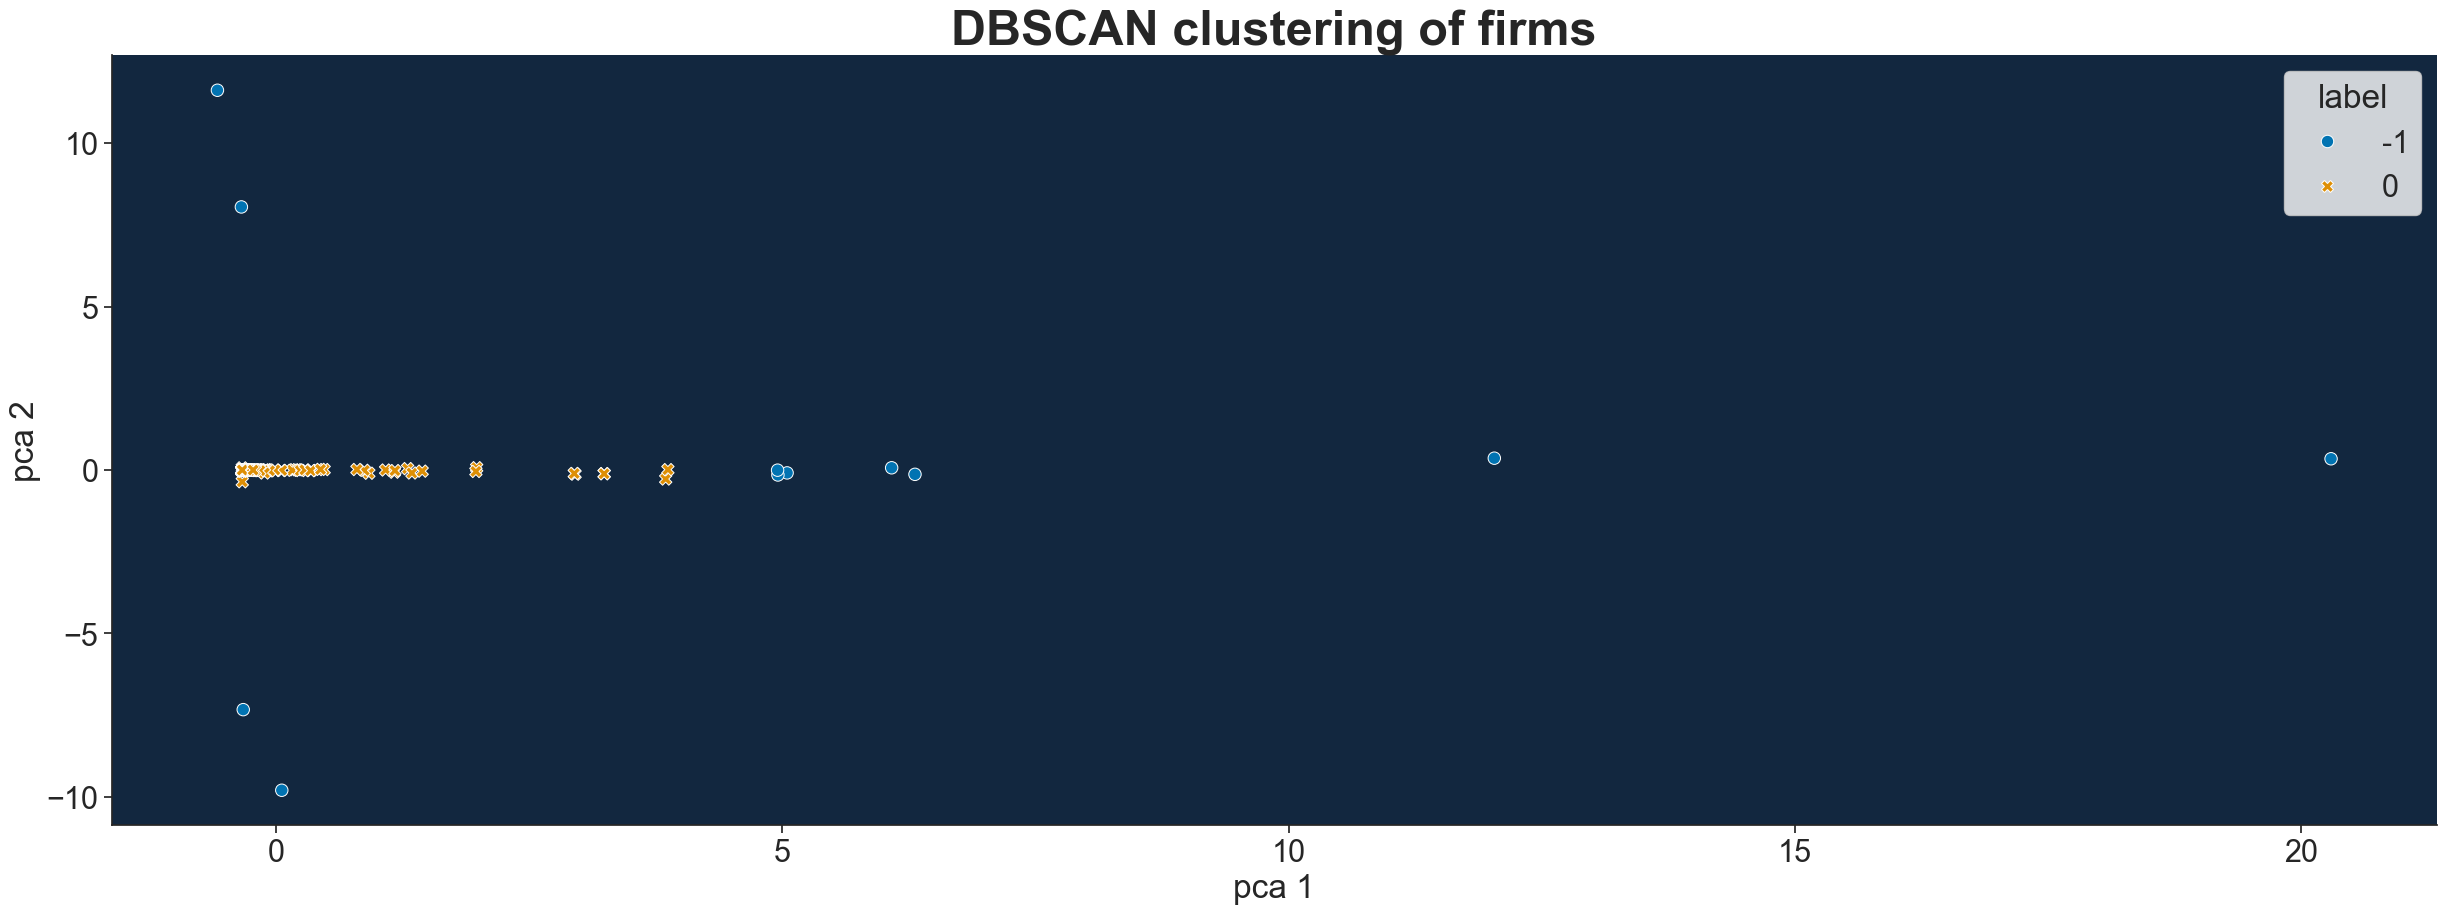

In [63]:
# Finally visualising the output
plt.rcParams['figure.figsize'] = [30, 10]
sns.set(font_scale=2) # font size
sns.set_style("ticks") # style

ax = sns.scatterplot(data = cluster_data, 
                     x = "pca 1", 
                     y = "pca 2", 
                     hue = "label",
                     s= 80,
                     palette=sns.color_palette("colorblind"),
                     style = "label")

ax.set_title( "DBSCAN clustering of firms", fontsize =35, fontweight="bold")
ax.set_facecolor('#12273F')

sns.despine()
plt.show()

In the above there is a cluster marked in orange, while all the other values are marked as outliers. This information could be used by the supervisors of the firms marked as outliers as it informs them that their firms differ from others. As a next step a different set of metrics could be used, for example you could only use data on firms profitability or their funding in order to identify outliers within those areas.

Additionally if i were to expand this project further I would look at fine tuning the values for epsilon and the min points for the above algorithm and other potential versions using other metrics.

## Section 3 - Written Section on using Microsoft Azure to create an end-to-end data pipeline

#

The data pipeline should follow the ETL pipeline structure of extracting the data, then transforming it before then loading it into a data lake or warehouse. Once ingested into the storage system the data could then be used to produce analytics such as table or charts. At each stage of the pipeline different tools and systems would be required.

Azure data factory can be used for extracting, preparing and then transforming the data and is therefore a tool that can be used within a data pipeline to ingest data into either data lakes or warehouses. Another useful feature of data factory is that it can be used for scheduling to automatically run tasks or the entire pipeline. Given the dataset we were given appears to be annual this scheduling may not be required but for processes which are required to be run more frequently then scheduling can be a very useful feature as it reduces the need for regular human intervention.

Although you can transform the data in data factory an alternative would be Databricks which is the implementation of spark in Azure. By utilising the spark system you would be able to transform very large volumes of data, utilising parallel processing to increase the speed you are able to perform some processing tasks. Finally a benefit of Databricks is that you can run multiple languages such as Scalar. Python and R on it, therefore allowing you to choose one that fits best for your needs.

Once the data is transformed it will need to be stored, this could be done in either an Azure data lake or warehouse. Based on the structured nature of the data and the fact that a report is what needs to be produced a warehouse may be the better option, however if the process were to start also including unstructured or semi structured data and the end goal shifted from an automated report to more advanced analytics and machine learning then a data lake may be the more optimal solution as its better for storing data of this kind.

Dependent on the required outputs, data can then feed into systems such as tableau or power BI so that it can be visualised in dashboards for users or it can be loaded into a system such as Azure analysis services where you can analyse the data in the cloud, therefore allowing large data models and complex queries to be run which may not be possible or as quick if run on a local machine, additionally the outputs of Azure analysis services can also been integrated into power BI too.

Another tool that could be used is Azure purview, which can be used for data governance across a data pipeline. Purview can enable you to map out where data is used, manage the metadata and finally classify sensitive data, which at the bank could be a very important feature given the sensitive nature of a lot of our data sets, as it can be important to ensure only authorised personal can access the data.

Finally Azure DevOps, can be used to provide version control across the whole pipeline, allowing the code to be written by multiple people at once, using pull requests to manage what changes are being made and finally making it easier to revert back to previous versions of code if errors or bugs are discovered.

So in summary, a complete end-to-end data pipeline can be created using Azure tools and systems to allow the data pipeline to be moved to the cloud, and provide the organisation with options to increase the volume of data being processed and produce more in depth analysis by utilizing the different Azure tools. 
